# Analyzing Results for Disease Prediction Value Add of PRS for Prostate Cancer
The first step is to complete the run_test_set.py analysis to save data from experiments.
Run the script for all experiments and then use this notebook code. Also interpret_ffnn.py

### Objective

The purpose of this notebook is to set up an organized framework to get all results of interest for pro.

This analysis will utilize the fixed 10-year incident train/val/test indices for each disease.

Imports and filenames will be at the top of this file.

In [1]:
from classes.results_analysis_wrapper import *

-------------------------
Working on datafields file
Loading array...
Done. Time: 4.034223794937134
-------------------------
Working on medications file
Total Time: 0.7769515514373779
-------------------------
Working on diagnoses file
Loading the array...
Total Time: 6.439762353897095
-------------------------
Working on antibodies file
Done
Check if experiment 1 test results have been set up. File not found.
/mnt/research1/Projects/projects/prs_analysis/experiment1/results_11.09.22/results//experiment1_results.txt
Check if experiment 2 test results have been set up. File not found.
/mnt/research1/Projects/projects/prs_analysis/experiment2/results_11.09.22/results//experiment2_results.txt
Check if experiment 3 test results have been set up. File not found.
/mnt/research1/Projects/projects/prs_analysis/experiment3/results_12.20.22/results//experiment3_results.txt
Check if experiment 25 test results have been set up. File not found.
/mnt/research1/Projects/projects/prs_analysis/experim

### Libraries

In [2]:
import gc
import h5py
import numpy as np
import os
import pandas as pd
import pickle
import plotly.graph_objects as go
import seaborn as sns
import time

from functools import reduce
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.metrics import roc_curve, auc, accuracy_score, balanced_accuracy_score, f1_score, precision_score, \
    recall_score, confusion_matrix
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from tqdm.notebook import tqdm

### Folders and Files

In [3]:
project_dir = "/mnt/research1/Projects/projects/prs_analysis"
pac_label = "/mnt/research1/prs2_analysis_basic/incident_cases/incident_cases_data/binclass_Prostate_Cancer_08.02.22/Prostate_Cancer_labels.txt"
#all_results_dir = "/mnt/research1/UKB/UK_Biobank/phenotype_data/prs_analysis_results"
all_results_dir = "/mnt/research1/prs2_basic_results"
# config_vars_log_filename = "/mnt/research1/Projects/projects/prs_analysis/config_files/config_vars_log_v2.txt"
config_vars_log_filename = "/mnt/research1/prs2_analysis_basic/config_files/config_file_for_pro_subgroups.txt"

## Get the dictionary with all the datafields, medications, diagnoses, etc.

In [4]:
features_dict = prepare_features_dict(datafields_main, diagnoses_file, diagnoses_names, females_only_disease=False,
 males_only_disease=False)

In [5]:
print(features_dict["datafields_features"].shape)
print(features_dict["diagnoses_features"].shape)
print(features_dict["medications_features"].shape)
print(len(features_dict["datafields_names"]))

(502492, 237)
(502641, 2642)
(502520, 378)
237


In [6]:
#features_dict["datafields_names"]

## Get experiments dictionary and objects for experiments and others

In [7]:
config_log = pd.read_csv(config_vars_log_filename, sep="\t")
config_log.head(50)

,Experiment,Disease,NG Features,PRS Features,Model Type,Experiment_Type,Date Started,GPU,VM,Completion,Backup Data,Test Run,Interpret NN,Extras
0,4a,D4,NG1,PRS1,M1,NG+PRS,07.12.24,NaN,NewVM,Done,Done,Done+IDs,Done,NaN
1,4b,D4,NG1,PRS1,M1,NG+PRS,07.12.24,NaN,NewVM,Done,Done,Done+IDs,Done,NaN
2,4c,D4,NG1,PRS1,M1,NG+PRS,07.12.24,NaN,NewVM,Done,Done,Done+IDs,Done,NaN
3,4d,D4,NG1,PRS1,M1,NG+PRS,07.12.24,NaN,NewVM,Done,Done,Done+IDs,Done,NaN
4,9d,D4,NG1,PRS1,M2,NG+PRS,07.12.24,NaN,NewVM,Done,Done,Done+IDs,Done,NaN
5,36d,D4,NG1,None,M1,NG+PRS,07.12.24,NaN,NewVM,Done,Done,Done+IDs,Done,NaN
6,37d,D4,NG1,None,M2,NG+PRS,07.12.24,NaN,NewVM,Done,Done,Done+IDs,Done,NaN


In [8]:
experiments_list = list(config_log["Experiment"])
print(len(experiments_list))

7


In [9]:
experiments_dict = get_experiments_dict(config_log, all_results_dir, experiments_list, save_allsubsets=True)

Check if experiment 37d test results have been set up. File not found.
/mnt/research1/prs2_basic_results/experiment37d/results_07.12.24/results//experiment37d_results.txt


In [10]:
pro_ng1_prs_m1 = experiments_dict["exp4c"]
pro_ng1_m1 = experiments_dict["exp36d"]

In [11]:
pro_ng1_m1.results_dir 

'/mnt/research1/prs2_basic_results/experiment36d/results_07.12.24/results/'

In [12]:
pro_ng1_prs_m1.results_dir 

'/mnt/research1/prs2_basic_results/experiment4c/results_07.12.24/results/'

In [13]:
# pro_ng1_m1.get_results_tables()
# pro_ng1_m1.feature_weights_stats.head(50)

In [14]:
# pro_ng1_prs_m1.get_results_tables()
# pro_ng1_prs_m1.feature_weights_stats.head(50)

In [15]:
#pac_ng1_m1.feature_weights_stats.to_csv("NG Weights.csv", index=False)

In [16]:
#pac_ng1_prs_m1.feature_weights_stats.to_csv("NG+PRS Weights.csv", index=False)

In [17]:
# Set up the combined NGPRSGroup objects
pro_compare = NGPRSGroup(exp_ng=pro_ng1_m1, exp_ng_prs=pro_ng1_prs_m1)

/mnt/research1/research/Repos/prs_sub_groups/classes/results_analysis.py:435: RuntimeWarning: invalid value encountered in double_scalars
  return (mean1 - mean2) / np.sqrt(var1 / n1 + var2 / n2)
/mnt/research1/research/Repos/prs_sub_groups/classes/results_analysis.py:431: RuntimeWarning: invalid value encountered in double_scalars
  d = (mean1 - mean2) / sd
/home/andrewhornback/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1182: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
/home/andrewhornback/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:6342: RuntimeWarning: invalid value encountered in double_scalars
  d = mean1 - mean2
/home/andrewhornback/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/mnt/research1/research/Repos/prs_sub_groups/classes/results_analysis.py:426: RuntimeWarning: invalid value encountered in double_sca

In [18]:
# Set up the Thresholding object which sets up groups
pro = ThresholdingWide(exp_ng=pro_ng1_m1, exp_ng_prs=pro_ng1_prs_m1, num_trials=10)

Mean Percent of Samples with Improved Prediction from PRSs: 62.89 +/- 1.61


In [19]:
count_cases = pro.exp_ng.all_samples_df[pro.exp_ng.all_samples_df['Label'] == 'Cases'].shape[0]
count_cases

5469

In [20]:
# Set up ThresholdingAllSamples object which selects the most average model and runs analyses on it
pro_all = ThresholdingAllSamplesWide(exp_ng=pro_ng1_m1, exp_ng_prs=pro_ng1_prs_m1, num_trials=10, split_samples=True)

Possible trials with no significant difference between train/val/test groups: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Percent value add for all possible trials: [0.6338761760358315, 0.6503010271083, 0.6418380099855989, 0.6109422878060231, 0.6304567110964492, 0.6251911157352484, 0.6264282134405907, 0.6494255425783654, 0.6315986474398422, 0.5969979762350359]
Distance to mean of all possible trials [0.004170605289702922, 0.020595456362171416, 0.012132439239470383, 0.01876328294010543, 0.0007511403503206449, 0.004514455010880103, 0.003277357305537798, 0.019719971832236838, 0.0018930766937136356, 0.03270759451109262]
Selected trial: 4
Percent of Samples with Improved Prediction from PRSs (Trial 4): 0.6304567110964492
Train Set Size: 141864
Test Set Size: 15763


In [21]:
#pac_all.groups_dict

In [22]:
#pac_all.get_feature_correlation_binary(features_dict,
                        #binary_feature="Illnesses of father - f.20107_Father_Lung cancer", numerical_feature="PAC_22",
                        #subgroup="top_5%")

In [23]:
# pac_all.get_feature_correlation_binary(features_dict,
#                         binary_feature="Illnesses of father - f.20107_Father_Lung cancer", numerical_feature="PAC_22",
#                         subgroup="top_10%")

In [24]:
# pac_all.get_feature_correlation_binary(features_dict,
#                         binary_feature="Illnesses of father - f.20107_Father_Lung cancer", numerical_feature="PAC_49",
#                         subgroup="top_10%")

In [25]:
# pac_all.get_feature_correlation_binary(features_dict,
#                         binary_feature="Illnesses of father - f.20107_Father_Lung cancer", numerical_feature="PAC_22",
#                         subgroup="bottom_10%")

In [26]:
# pac_all.get_feature_correlation_binary(features_dict,
#                         binary_feature="Illnesses of father - f.20107_Father_Lung cancer", numerical_feature="PAC_49",
#                         subgroup="bottom_10%")

In [27]:
# pac_all.get_feature_correlation_binary(features_dict,
#                         binary_feature="Illnesses of siblings - f.20111_Sibling_Lung cancer", numerical_feature="PAC_22",
#                         subgroup="top_10%")

In [28]:
# pac_all.get_feature_correlation_binary(features_dict,
#                         binary_feature="Illnesses of siblings - f.20111_Sibling_Lung cancer", numerical_feature="PAC_49",
#                         subgroup="top_10%")

In [29]:
# pac_all.get_feature_correlation_binary(features_dict,
#                         binary_feature="Illnesses of siblings - f.20111_Sibling_Lung cancer", numerical_feature="PAC_22",
#                         subgroup="bottom_10%")

In [30]:
# pac_all.get_feature_correlation_binary(features_dict,
#                         binary_feature="Illnesses of siblings - f.20111_Sibling_Lung cancer", numerical_feature="PAC_49",
#                         subgroup="bottom_10%")

## Start by exploring the NGPRSGroup object.
For each table and figure, iteratively run and get the results. Then write about it to explain it

/mnt/research1/research/Repos/prs_sub_groups/classes/results_analysis.py:435: RuntimeWarning: invalid value encountered in double_scalars
  return (mean1 - mean2) / np.sqrt(var1 / n1 + var2 / n2)
/mnt/research1/research/Repos/prs_sub_groups/classes/results_analysis.py:431: RuntimeWarning: invalid value encountered in double_scalars
  d = (mean1 - mean2) / sd


    Percentile  Student's T       p-value     Cohen  Diff in Prevalence
0         0.00    -2.037219  2.214838e-02 -0.288106           -0.127797
1         0.01     6.210433  6.234639e-09  0.878288            0.190282
2         0.02          NaN           NaN       NaN            0.000000
3         0.03    -6.210433  6.234639e-09 -0.878288           -0.190282
4         0.04    -3.475812  3.788255e-04 -0.491554           -0.127389
..         ...          ...           ...       ...                 ...
95        0.95    16.291922  4.502720e-30  2.304026            5.453631
96        0.96    11.261130  9.939348e-20  1.592564            4.287589
97        0.97    19.460813  6.546621e-36  2.752175            4.878760
98        0.98    18.302513  7.692213e-34  2.588366            5.306665
99        0.99    15.180099  6.793476e-28  2.146790            7.025988

[100 rows x 5 columns]


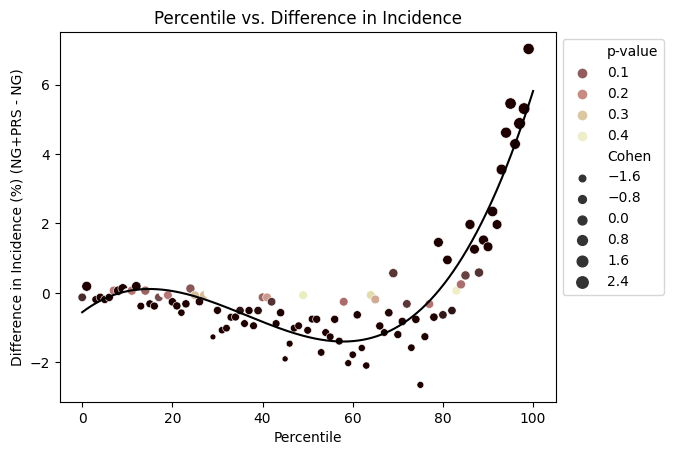

In [31]:
pro_compare.per_prev_metrics_t(display_figures=True)

In [32]:
pro_compare.metrics_comparison_results

,Statistic,Student's T,p-value,Cohen,NG_PRS - NG
0,AUC,16.314957,3.134494e-12,7.690945,0.059941
1,Accuracy,22.918761,9.060751e-15,10.804007,0.076664
2,Balanced Accuracy,11.431065,1.098537e-09,5.388656,0.039134
3,F1,18.300591,4.435489e-13,8.626981,0.021144
4,Precision,18.570179,3.452140e-13,8.754066,0.012536
5,Recall,-0.164666,8.710417e-01,-0.077624,-0.001191
6,TN,18.013554,5.813585e-13,8.491671,1210.800000
7,FP,-24.455389,2.916553e-15,-11.528381,-1210.800000
8,FN,0.138915,8.910601e-01,0.065485,0.700000
9,TP,-0.179935,8.592140e-01,-0.084822,-0.700000


In [33]:
pro_compare.bestfit_results_df

,Percentile,Mean Bestfit Incidence (NG),Std Bestfit Incidence (NG),Mean Bestfit Incidence (NG+PRS),Std Bestfit Incidence (NG+PRS),Difference,t-value,p-value,d-value
0,0.000000,0.506874,0.283616,0.735323,0.175584,0.228449,2.054586,5.473113e-02,0.968541
1,1.010101,0.411142,0.225274,0.574675,0.140673,0.163533,1.847220,8.122000e-02,0.870788
2,2.020202,0.329704,0.173210,0.434929,0.111517,0.105225,1.532374,1.428175e-01,0.722368
3,3.030303,0.261923,0.127782,0.314960,0.088729,0.053037,1.022781,3.199618e-01,0.482143
4,4.040404,0.207177,0.090238,0.213675,0.073269,0.006498,0.167702,8.686876e-01,0.079055
...,...,...,...,...,...,...,...,...,...
95,95.959596,7.677898,0.401375,12.298170,0.752934,4.620272,16.245002,3.370765e-12,7.657967
96,96.969697,7.860558,0.464078,12.975614,0.869797,5.115056,15.565295,6.930202e-12,7.337550
97,97.979798,8.053886,0.533878,13.691995,0.996187,5.638110,14.965420,1.339770e-11,7.054767
98,98.989899,8.258454,0.610898,14.448844,1.132366,6.190390,14.433824,2.449591e-11,6.804170


In [34]:
#pro_compare.exp_ng.per_prev_files

/home/andrewhornback/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


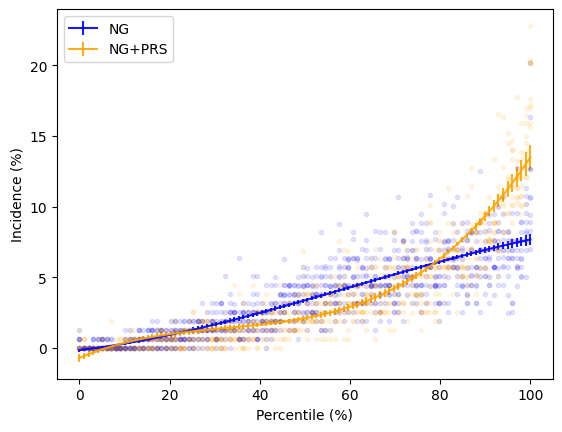

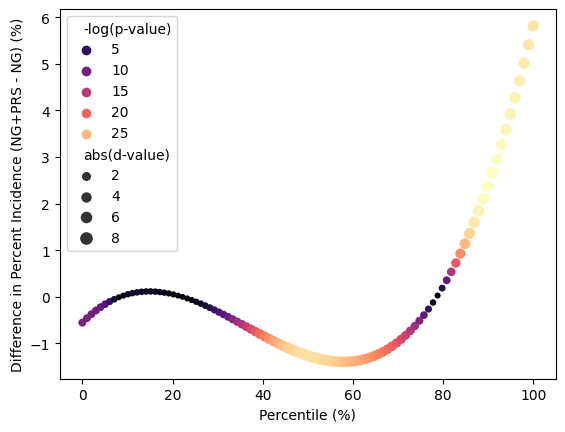

In [35]:
pro_compare.get_per_prev_figure(display_figures=True, order=3, include_scatter=True)

/home/andrewhornback/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1182: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
/home/andrewhornback/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:6342: RuntimeWarning: invalid value encountered in double_scalars
  d = mean1 - mean2
/home/andrewhornback/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/mnt/research1/research/Repos/prs_sub_groups/classes/results_analysis.py:426: RuntimeWarning: invalid value encountered in double_scalars
  d = (np.mean(u1) - np.mean(u2)) / sd
/mnt/research1/research/Repos/prs_sub_groups/classes/results_analysis.py:597: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_test, p_value = stats.ttest_ind(a=pct_group1,


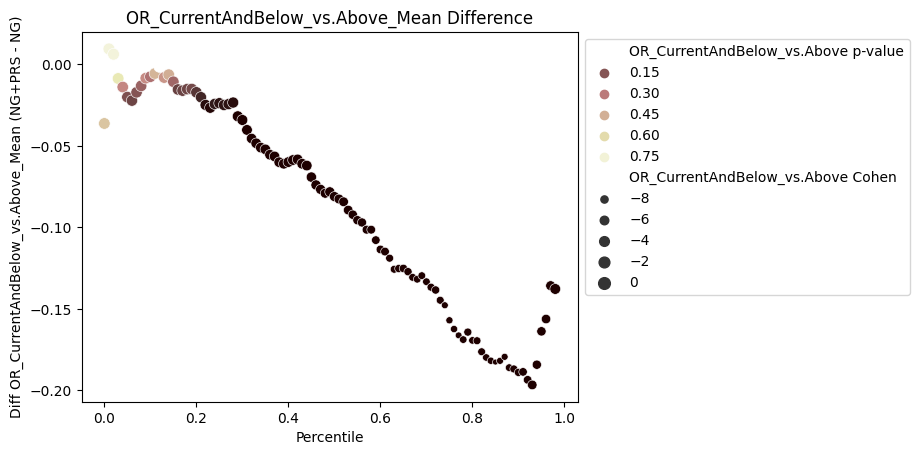

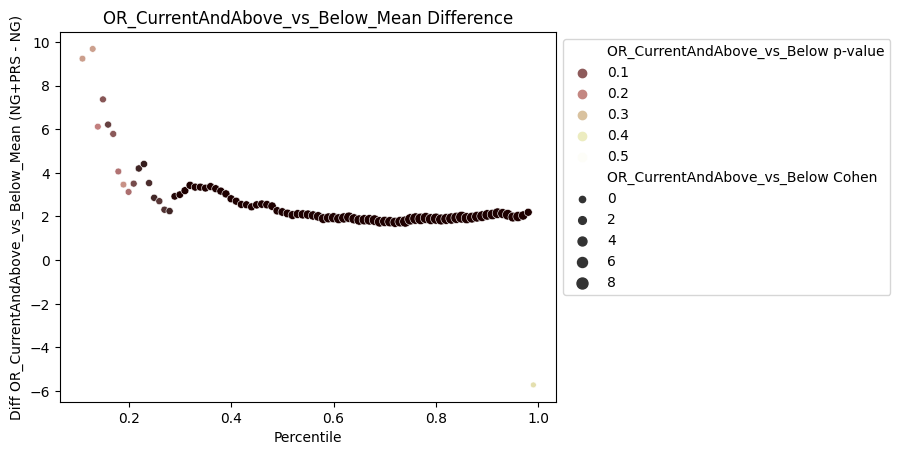

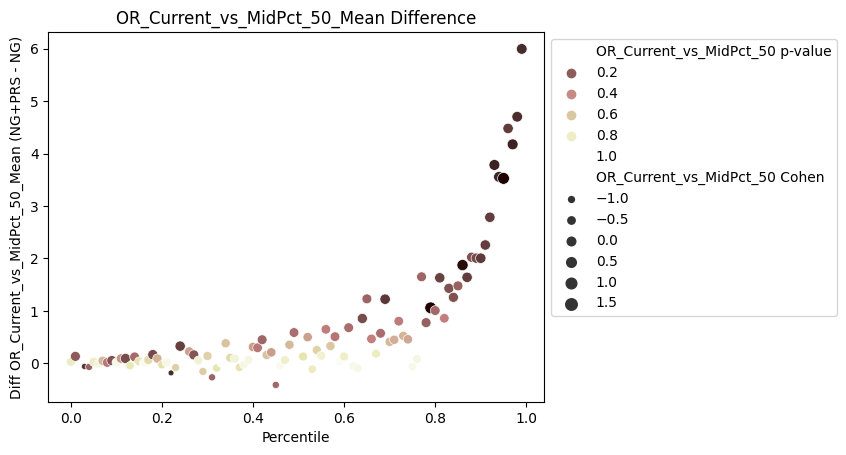

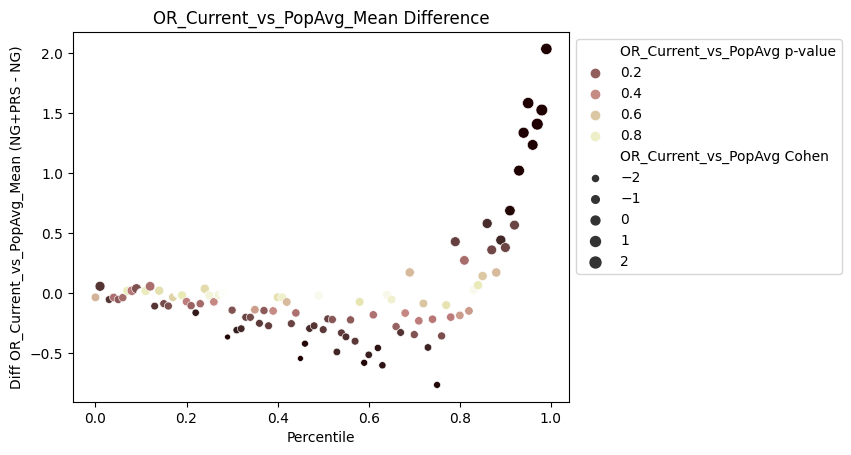

In [36]:
pro_compare.or_metrics_t(display_figures=True)

In [37]:
pro_compare.mean_metrics

,Metric,Mean,Std
0,AUC,0.0599,0.0063
1,Accuracy,0.0767,0.0063
2,Balanced Accuracy,0.0391,0.0065
3,F1,0.0211,0.0023
4,Precision,0.0125,0.0013
5,Recall,-0.0012,0.0082


In [38]:
pro_compare.metrics_comparison_results

,Statistic,Student's T,p-value,Cohen,NG_PRS - NG
0,AUC,16.314957,3.134494e-12,7.690945,0.059941
1,Accuracy,22.918761,9.060751e-15,10.804007,0.076664
2,Balanced Accuracy,11.431065,1.098537e-09,5.388656,0.039134
3,F1,18.300591,4.435489e-13,8.626981,0.021144
4,Precision,18.570179,3.452140e-13,8.754066,0.012536
5,Recall,-0.164666,8.710417e-01,-0.077624,-0.001191
6,TN,18.013554,5.813585e-13,8.491671,1210.800000
7,FP,-24.455389,2.916553e-15,-11.528381,-1210.800000
8,FN,0.138915,8.910601e-01,0.065485,0.700000
9,TP,-0.179935,8.592140e-01,-0.084822,-0.700000


In [39]:
pro.exp_ng.results_stats_table

,Trial,AUC,Accuracy,Balanced Accuracy,F1,Precision,Recall,TN,FP,FN,TP
0,1,0.702385,0.584539,0.655974,0.113238,0.061359,0.732984,8835,6425,153,420
1,2,0.713870,0.599912,0.666544,0.112554,0.060922,0.738095,9126,6212,143,403
2,3,0.693020,0.573775,0.648531,0.104802,0.056461,0.728782,8689,6601,147,395
3,4,0.704972,0.575072,0.653644,0.107884,0.058195,0.738095,8617,6522,143,403
4,5,0.722966,0.575116,0.664420,0.106195,0.057085,0.760077,8627,6541,125,396
5,6,0.703043,0.580392,0.659268,0.108005,0.058230,0.743925,8695,6437,137,398
6,7,0.703777,0.574889,0.650760,0.108043,0.058324,0.732369,8638,6539,148,405
7,8,0.703066,0.590532,0.647921,0.107966,0.058428,0.709619,8927,6301,160,391
8,9,0.708032,0.586510,0.657313,0.110572,0.059793,0.733453,8946,6447,149,410
9,10,0.719629,0.591333,0.664967,0.110882,0.059905,0.744015,8971,6340,139,404


In [40]:
print(f"NG Mean AUC: {np.mean(pro.exp_ng.results_stats_table['AUC'])}")

NG Mean AUC: 0.7074760330627533


In [41]:
print(f"NG StD AUC: {np.std(pro.exp_ng.results_stats_table['AUC'])}")

NG StD AUC: 0.008501684029980635


In [42]:
pro.exp_ng_prs.results_stats_table

,Trial,AUC,Accuracy,Balanced Accuracy,F1,Precision,Recall,TN,FP,FN,TP
0,1,0.771908,0.657930,0.694048,0.134271,0.073905,0.732984,9997,5263,153,420
1,2,0.768948,0.664883,0.695770,0.130087,0.071416,0.728938,10163,5175,148,398
2,3,0.756165,0.652602,0.692012,0.126429,0.069169,0.734317,9934,5356,144,398
3,4,0.763866,0.652853,0.698351,0.130331,0.071391,0.747253,9832,5307,138,408
4,5,0.781581,0.655300,0.710523,0.129147,0.070487,0.769674,9880,5288,120,401
5,6,0.772382,0.665986,0.706282,0.132891,0.072909,0.749533,10033,5099,134,401
6,7,0.768395,0.660648,0.695202,0.131750,0.072386,0.732369,9987,5190,148,405
7,8,0.760843,0.666836,0.681331,0.127469,0.070150,0.696915,10138,5090,167,384
8,9,0.760061,0.655466,0.687872,0.128173,0.070322,0.722719,10052,5341,155,404
9,10,0.770017,0.666204,0.699289,0.131034,0.071931,0.734807,10163,5148,144,399


In [43]:
print(f"NG PRS Mean AUC: {np.mean(pro.exp_ng_prs.results_stats_table['AUC'])}")

NG PRS Mean AUC: 0.7674166762626504


In [44]:
print(f"NG PRS StD AUC: {np.std(pro.exp_ng_prs.results_stats_table['AUC'])}")

NG PRS StD AUC: 0.007014541037605014


In [45]:
pro_compare.results_df

,Percentile,Student's T,p-value,Cohen
0,0.00,-2.037219,2.214838e-02,-0.288106
1,0.01,6.210433,6.234639e-09,0.878288
2,0.02,NaN,NaN,NaN
3,0.03,-6.210433,6.234639e-09,-0.878288
4,0.04,-3.475812,3.788255e-04,-0.491554
...,...,...,...,...
95,0.95,16.291922,4.502720e-30,2.304026
96,0.96,11.261130,9.939348e-20,1.592564
97,0.97,19.460813,6.546621e-36,2.752175
98,0.98,18.302513,7.692213e-34,2.588366


In [46]:
pro_compare.diff_table

,Percentile,Diff in Prevalence
0,0.00,-0.127797
1,0.01,0.190282
2,0.02,0.000000
3,0.03,-0.190282
4,0.04,-0.127389
...,...,...
95,0.95,5.453631
96,0.96,4.287589
97,0.97,4.878760
98,0.98,5.306665


In [47]:
pro_compare.odds_ratio_comparison_df

,Percentile,OR_CurrentAndBelow_vs.Above Student's t-Test,OR_CurrentAndBelow_vs.Above p-value,OR_CurrentAndBelow_vs.Above Cohen,OR_CurrentAndAbove_vs_Below Student's t-Test,OR_CurrentAndAbove_vs_Below p-value,OR_CurrentAndAbove_vs_Below Cohen,OR_Current_vs_MidPct_50 Student's t-Test,OR_Current_vs_MidPct_50 p-value,OR_Current_vs_MidPct_50 Cohen,OR_Current_vs_PopAvg Student's t-Test,OR_Current_vs_PopAvg p-value,OR_Current_vs_PopAvg Cohen
0,0.00,-0.651947,5.226736e-01,-0.307331,NaN,NaN,NaN,0.265511,0.793633,0.125163,-0.652651,0.522230,-0.307663
1,0.01,0.311759,7.588060e-01,0.146965,NaN,NaN,NaN,1.349097,0.194033,0.635970,1.963080,0.065279,0.925405
2,0.02,0.311230,7.592016e-01,0.146715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.03,-0.454692,6.547670e-01,-0.214344,NaN,NaN,NaN,-1.898341,0.073805,-0.894887,-1.961694,0.065452,-0.924751
4,0.04,-0.974575,3.426874e-01,-0.459419,NaN,NaN,NaN,-1.247256,0.228289,-0.587962,-1.094357,0.288227,-0.515885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.95,-10.039482,8.405167e-09,-4.732657,11.604174,8.642992e-10,5.470260,3.496346,0.002578,1.648193,5.040030,0.000085,2.375893
96,0.96,-9.760005,1.296230e-08,-4.600910,13.479974,7.594829e-11,6.354521,1.803808,0.088024,0.850323,3.584858,0.002117,1.689918
97,0.97,-8.024880,2.344636e-07,-3.782965,9.476378,2.030050e-08,4.467208,2.346050,0.030626,1.105938,6.115973,0.000009,2.883097
98,0.98,-4.476999,2.914194e-04,-2.110477,4.988431,9.519607e-05,2.351569,2.094088,0.050674,0.987163,5.868949,0.000015,2.766649


In [48]:
pro_compare.bestfit_results_df

,Percentile,Mean Bestfit Incidence (NG),Std Bestfit Incidence (NG),Mean Bestfit Incidence (NG+PRS),Std Bestfit Incidence (NG+PRS),Difference,t-value,p-value,d-value,-log(p-value),abs(d-value)
0,0.000000,-0.150512,0.108057,-0.707396,0.283490,-0.556884,-5.506705,3.142976e-05,-2.595886,10.367755,2.595886
1,1.010101,-0.112161,0.092423,-0.573780,0.238259,-0.461619,-5.418968,3.783611e-05,-2.554526,10.182247,2.554526
2,2.020202,-0.071953,0.078946,-0.446559,0.196268,-0.374606,-5.312297,4.746527e-05,-2.504241,9.955512,2.504241
3,3.030303,-0.029921,0.068134,-0.325531,0.157763,-0.295610,-5.160564,6.567268e-05,-2.432713,9.630828,2.432713
4,4.040404,0.013903,0.060617,-0.210491,0.123283,-0.224393,-4.900154,1.152913e-04,-2.309955,9.068048,2.309955
...,...,...,...,...,...,...,...,...,...,...,...
95,95.959596,7.387094,0.304856,11.659962,0.620048,4.272868,18.552446,3.509171e-13,8.745707,28.678226,8.745707
96,96.969697,7.460057,0.326255,12.096662,0.685109,4.636605,18.330701,4.312332e-13,8.641175,28.472127,8.641175
97,97.979798,7.531860,0.348904,12.546342,0.753703,5.014482,18.112784,5.292162e-13,8.538448,28.267379,8.538448
98,98.989899,7.602473,0.372806,13.009207,0.825839,5.406735,17.901363,6.468892e-13,8.438784,28.066601,8.438784


/home/andrewhornback/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


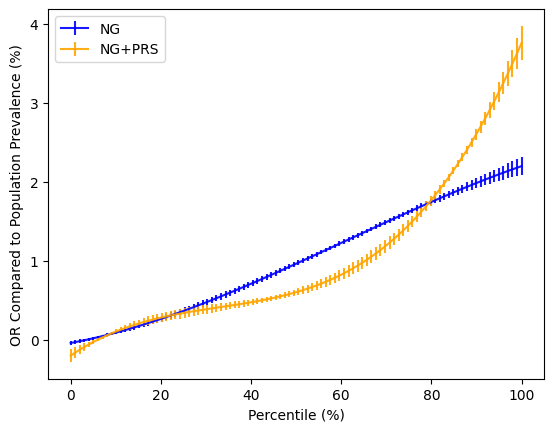

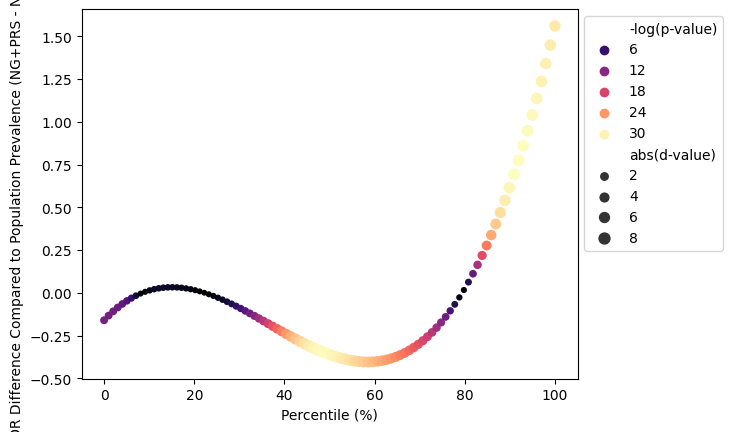

In [49]:
# TODO fix this
pro_compare.get_or_bestfit_figures(display_figures=True, category=3, order=3)
# Category can be from 0 to 3

In [50]:
pro_compare.or_bestfit_results_df_list

[    Percentile  Mean Bestfit Compared to Population Prevalence (NG)  \
 0     0.000000                                          -0.043246     
 1     1.010101                                          -0.032338     
 2     2.020202                                          -0.020902     
 3     3.030303                                          -0.008948     
 4     4.040404                                           0.003516     
 ..         ...                                                ...     
 95   95.959596                                           2.113354     
 96   96.969697                                           2.134528     
 97   97.979798                                           2.155382     
 98   98.989899                                           2.175907     
 99  100.000000                                           2.196093     
 
     Std OR (NG)  Mean Bestfit Compared to Population Prevalence (NG+PRS)  \
 0      0.030824                                         

## Now try to look into the Thresholding object.
This one provides data on how consistently the groups can be split up into the top and bottom categories.

In [51]:
pro.merged_scores_list[0]

,UKB ID,NG+PRS_Score,Label,NG_Score,NG_Diff,NG+PRS_Diff,NG+PRS_Diff_NoAbs,NG_Diff_NoAbs,NGvsNG+PRS_Diff,NGvsNG+PRS_Diff_pct,Trial
0,1512822,0.674339,0.0,0.392669,0.392669,0.674339,-0.674339,-0.392669,-0.281670,0.008625,0
1,4596413,0.628959,0.0,0.609560,0.609560,0.628959,-0.628959,-0.609560,-0.019398,0.318623,0
2,3800569,0.456021,0.0,0.624632,0.624632,0.456021,-0.456021,-0.624632,0.168611,0.858474,0
3,1911473,0.761959,0.0,0.582547,0.582547,0.761959,-0.761959,-0.582547,-0.179412,0.051750,0
4,4045808,0.015930,0.0,0.092835,0.092835,0.015930,-0.015930,-0.092835,0.076905,0.649459,0
...,...,...,...,...,...,...,...,...,...,...,...
15879,1820140,0.639762,0.0,0.665153,0.665153,0.639762,-0.639762,-0.665153,0.025392,0.464493,0
15880,5820983,0.432753,0.0,0.441163,0.441163,0.432753,-0.432753,-0.441163,0.008410,0.405565,0
15881,3739005,0.278676,0.0,0.369878,0.369878,0.278676,-0.278676,-0.369878,0.091202,0.692269,0
15882,2205962,0.141249,0.0,0.213088,0.213088,0.141249,-0.141249,-0.213088,0.071839,0.633468,0


In [52]:
#pro.merged_scores_list

In [53]:
#pro.trials_groups_dicts

In [54]:
# for i in range(len(pro.trials_groups_dicts)):
#     print(i)
#     print(np.unique(pro.trials_groups_dicts[i]["top_0.9"]["Label"]))

Metric       AUC  Accuracy  Balanced Accuracy        F1  Precision    Recall  \
0       0.726134  0.724528           0.631329  0.831220   0.779060  0.529412   
1       0.836450  0.740127           0.736797  0.843675   0.743092  0.733333   
2       0.784266  0.768170           0.671354  0.736636   0.625214  0.566667   
3       0.697054  0.741401           0.644684  0.777787   0.667102  0.541667   
4       0.740063  0.749049           0.606413  0.872712   0.881040  0.451613   
..           ...       ...                ...       ...        ...       ...   
5       0.103118  0.105445           0.080163  0.037372   0.021710  0.053045   
6       0.109507  0.102446           0.070898  0.037136   0.021939  0.036900   
7       0.107123  0.112420           0.081536  0.040643   0.023806  0.048356   
8       0.089303  0.103107           0.073154  0.037735   0.022147  0.041016   
9       0.106434  0.112335           0.078091  0.040406   0.023720  0.041339   

Metric      TN      FP    FN    TP  Tot

/mnt/research1/research/Repos/prs_sub_groups/classes/results_analysis.py:3201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alltrials_no_others["Subgroup"] = alltrials_no_others["Subgroup"].replace(key, figure_names_dict[key])


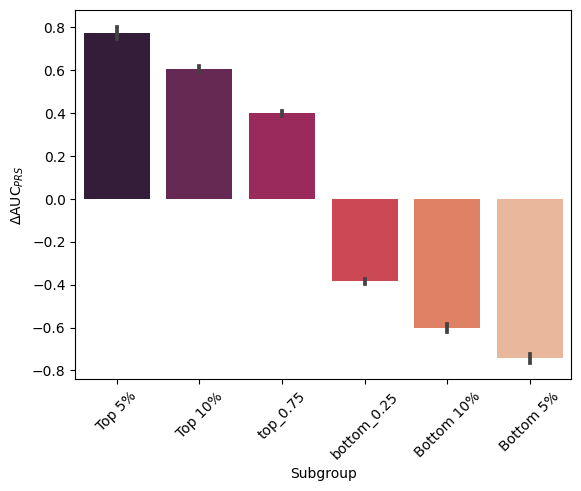

In [55]:
pro.get_group_stats()

['Top 5%', 'Top 10%', 'Top 25%', 'Bottom 25%', 'Bottom 10%', 'Bottom 5%']
[[ 0.77579639]
 [ 0.6048681 ]
 [ 0.39972843]
 [-0.38498512]
 [-0.60295761]
 [-0.74321497]]


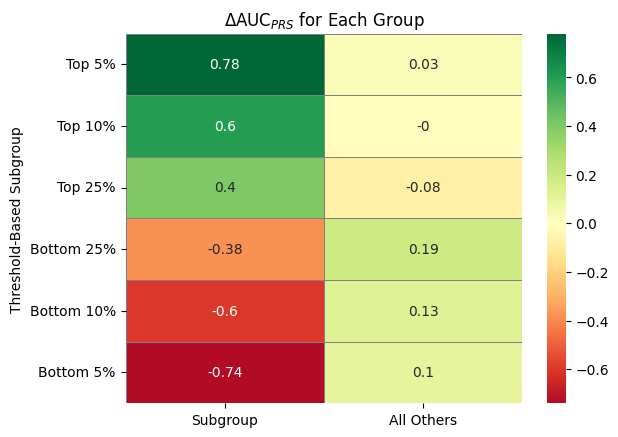

In [56]:
pro.get_auc_heatmap()

In [57]:
pro.removed_trials # Removed if there is nobody of a given class

{'top_0.95': [],
 'top_0.95_others': [],
 'top_0.9': [],
 'top_0.9_others': [],
 'top_0.75': [],
 'top_0.75_others': [],
 'bottom_0.25': [],
 'bottom_0.25_others': [],
 'bottom_0.1': [],
 'bottom_0.1_others': [],
 'bottom_0.05': [],
 'bottom_0.05_others': []}

In [58]:
pro.all_group_stats.keys()

dict_keys(['top_0.95', 'top_0.95_others', 'top_0.9', 'top_0.9_others', 'top_0.75', 'top_0.75_others', 'bottom_0.25', 'bottom_0.25_others', 'bottom_0.1', 'bottom_0.1_others', 'bottom_0.05', 'bottom_0.05_others'])

In [59]:
pro.allstats_delta[(pro.allstats_delta["Metric"] == "AUC") & (pro.allstats_delta["Subgroup"] == "top_0.9")]

,Metric,Mean,Std,Subgroup
0,AUC,0.604868,0.022454,top_0.9


In [60]:
pro.all_group_stats["top_0.9"]

,Metric,NG Mean,NG Std,NG+PRS Mean,NG+PRS Std,NG+PRS - NG Mean,t-value,p-value,d-values
0,AUC,0.389953,0.022860,0.994821,0.002483,0.604868,78.915440,2.547386e-24,37.201095
1,Accuracy,0.339620,0.015314,0.958499,0.010399,0.618879,100.298579,3.433866e-26,47.281204
2,Balanced Accuracy,0.440916,0.017573,0.961256,0.010168,0.520341,76.886868,4.065364e-24,36.244817
3,F1,0.057369,0.009615,0.631724,0.049642,0.574355,34.076639,8.402083e-18,16.063882
4,Precision,0.030290,0.005262,0.472209,0.055553,0.441919,23.758476,4.835311e-15,11.199853
5,Recall,0.550297,0.032843,0.964226,0.019692,0.413929,32.427543,2.024178e-17,15.286490
6,TN,504.600000,24.409834,1458.600000,19.111253,954.000000,92.318738,1.522916e-25,43.519471
7,FP,1017.500000,26.915609,63.500000,16.758580,-954.000000,-90.265499,2.281084e-25,-42.551564
8,FN,25.700000,3.034798,2.100000,1.220656,-23.600000,-21.644192,2.452286e-14,-10.203170
9,TP,31.800000,5.670979,55.400000,7.539231,23.600000,7.504785,6.014424e-07,3.537790


In [61]:
pro.allstats_delta[(pro.allstats_delta["Metric"] == "AUC") & (pro.allstats_delta["Subgroup"] == "bottom_0.1")]

,Metric,Mean,Std,Subgroup
0,AUC,-0.602958,0.028733,bottom_0.1


In [62]:
pro.all_group_stats["bottom_0.1"]

,Metric,NG Mean,NG Std,NG+PRS Mean,NG+PRS Std,NG+PRS - NG Mean,t-value,p-value,d-values
0,AUC,0.743235,0.041650,0.140278,0.019234,-0.602958,-39.429201,6.284315e-19,-18.587104
1,Accuracy,0.581950,0.036193,0.232885,0.020751,-0.349065,-25.100727,1.848291e-15,-11.832596
2,Balanced Accuracy,0.678506,0.035223,0.227395,0.026996,-0.451111,-30.495632,6.001555e-17,-14.375779
3,F1,0.128273,0.017716,0.021824,0.004097,-0.106449,-17.562554,8.964266e-13,-8.279067
4,Precision,0.069941,0.010379,0.011482,0.002156,-0.058459,-16.544695,2.473722e-12,-7.799244
5,Recall,0.783204,0.046907,0.221372,0.046996,-0.561832,-25.384152,1.518054e-15,-11.966204
6,TN,870.700000,59.583639,354.200000,33.325066,-516.500000,-22.696701,1.073635e-14,-10.699328
7,FP,646.300000,53.246690,1162.800000,28.718635,516.500000,25.612550,1.297349e-15,12.073872
8,FN,13.400000,3.469870,48.100000,6.155485,34.700000,14.732279,1.741675e-11,6.944863
9,TP,48.200000,4.728636,13.500000,2.500000,-34.700000,-19.462194,1.541218e-13,-9.174566


In [63]:
pro.get_per_prev_results(order=2)

/mnt/research1/research/Repos/prs_sub_groups/classes/results_analysis.py:3426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_cols["NG_Percentile"] = relevant_cols["NG_Score"].rank(pct=True)
/mnt/research1/research/Repos/prs_sub_groups/classes/results_analysis.py:3427: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_cols["NG+PRS_Percentile"] = relevant_cols["NG+PRS_Score"].rank(pct=True)
/mnt/research1/research/Repos/prs_sub_groups/classes/results_analysis.py:3426: SettingWithCopyWarning: 
A 

In [64]:
pro.per_prev_bestfit

{'top_0.95':     Percentile (%)  NG Mean Prevalence (%)  NG Prevalence Std  \
 0             0.00               12.552625           2.407601   
 1             0.01               12.207943           2.330742   
 2             0.02               11.868118           2.255481   
 3             0.03               11.533150           2.181835   
 4             0.04               11.203038           2.109820   
 ..             ...                     ...                ...   
 95            0.95                1.492553           0.374735   
 96            0.96                1.609247           0.403551   
 97            0.97                1.730798           0.436456   
 98            0.98                1.857206           0.472990   
 99            0.99                1.988471           0.512753   
 
     NG+PRS Mean Prevalence (%)  NG+PRS Prevalence Std  
 0                     8.051230               1.400338  
 1                     7.377442               1.280768  
 2                     

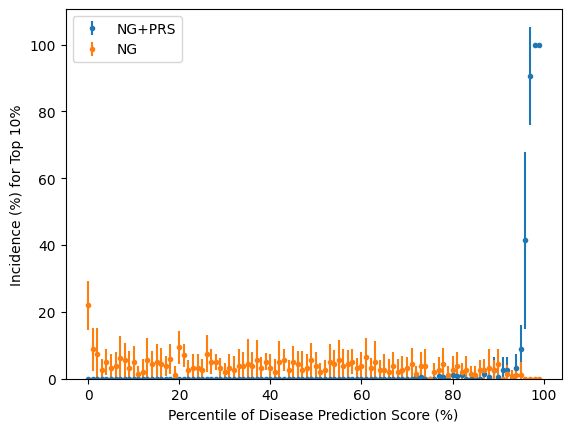

In [65]:
pro.get_per_prev_plots(group="top_0.9", bestfit=False, group_name="Top 10%")
# Can change group as needed
# Bestfit provides a bestfit line using the results from get_per_prev_results(order=3)

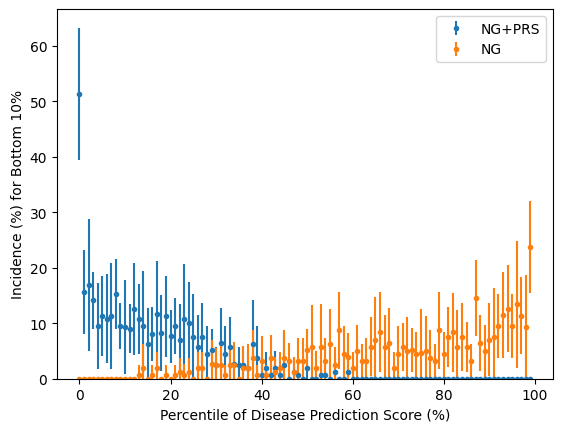

In [66]:
pro.get_per_prev_plots(group="bottom_0.1", bestfit=False, group_name="Bottom 10%")

In [67]:
pro.per_prev_all

{'top_0.95':     Percentile (%)  NG Mean Prevalence (%)  NG Prevalence Std  \
 0             0.00               58.571429          16.225452   
 1             0.01                8.750000          11.250000   
 2             0.02               11.250000          11.792476   
 3             0.03               10.000000          10.897247   
 4             0.04                8.750000           8.003905   
 ..             ...                     ...                ...   
 95            0.95                0.000000           0.000000   
 96            0.96                0.000000           0.000000   
 97            0.97                0.000000           0.000000   
 98            0.98                0.000000           0.000000   
 99            0.99                0.000000           0.000000   
 
     NG+PRS Mean Prevalence (%)  NG+PRS Prevalence Std  
 0                         0.00               0.000000  
 1                         0.00               0.000000  
 2                     

['Top 5%', 'Top 10%', 'Top 25%', 'Bottom 25%', 'Bottom 10%', 'Bottom 5%']
[[ 0.77579639]
 [ 0.6048681 ]
 [ 0.39972843]
 [-0.38498512]
 [-0.60295761]
 [-0.74321497]]


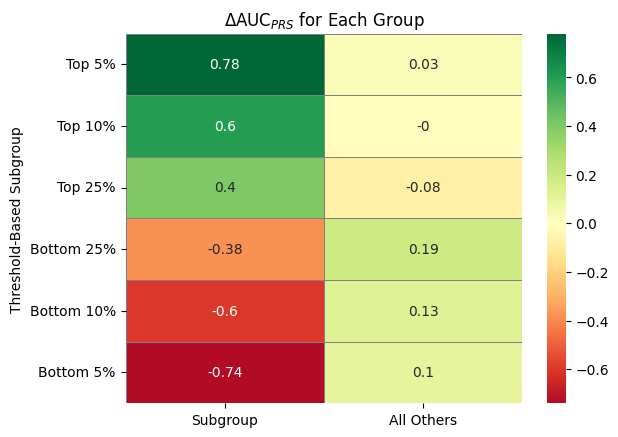

In [68]:
pro.get_auc_heatmap()

In [69]:
pro.all_group_stats.keys()

dict_keys(['top_0.95', 'top_0.95_others', 'top_0.9', 'top_0.9_others', 'top_0.75', 'top_0.75_others', 'bottom_0.25', 'bottom_0.25_others', 'bottom_0.1', 'bottom_0.1_others', 'bottom_0.05', 'bottom_0.05_others'])

['Top 25%', 'Bottom 25%']
[[ 0.39972843]
 [-0.38498512]]


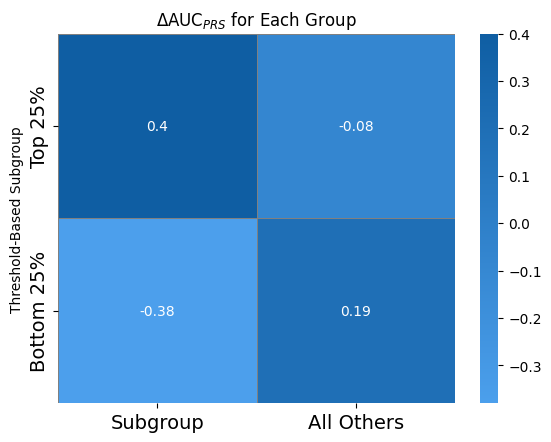

In [70]:
pro.get_auc_heatmap_alt()

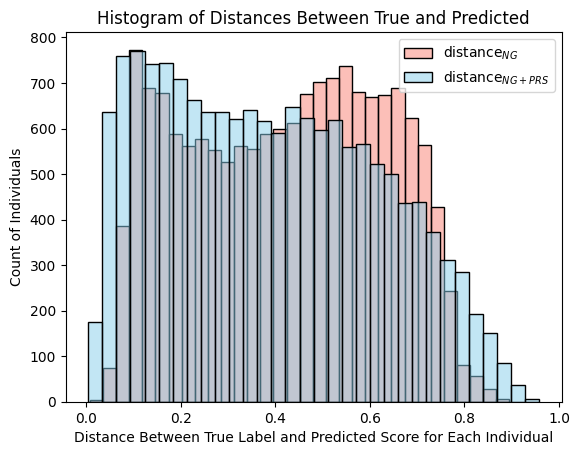

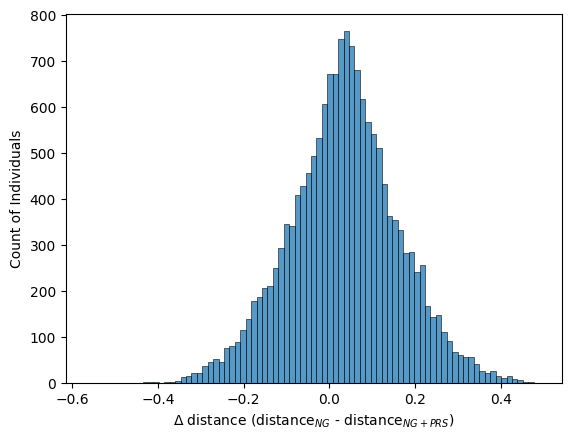

In [71]:
pro.get_distplot(trial=0)

          Group Mean Min Delta Dist Mean Max Delta Dist Std Min Delta Dist  \
0      top_0.95               0.248              0.5091             0.0043   
2       top_0.9              0.1971              0.5091             0.0036   
8    bottom_0.1             -0.4973              -0.127             0.0465   
10  bottom_0.05             -0.4973              -0.176             0.0465   

   Std Max Delta Dist  
0              0.0195  
2              0.0195  
8              0.0052  
10             0.0054  


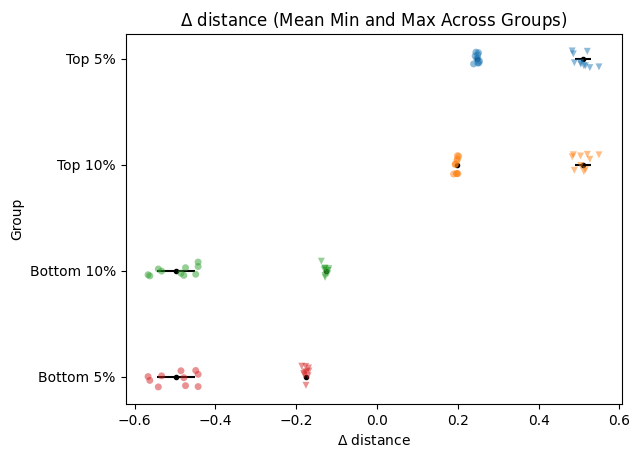

In [72]:
pro.get_subgroup_ranges()

## Next look at the ThresholdingAllSamples object for characterizing them
For each table and figure, iteratively run and get the results. Then write about it to explain it

In [73]:
pro_all.possible_trials

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [74]:
pro_all.selected_trial

4

In [75]:
pro_all.merged_scores

,UKB ID,Label,NG_Score,Subset,NG+PRS_Score,NG_Diff,NG+PRS_Diff,NG+PRS_Diff_NoAbs,NG_Diff_NoAbs,NGvsNG+PRS_Diff,NGvsNG+PRS_Diff_pct
0,2190809,0.0,0.073386,Test,0.021281,0.073386,0.021281,-0.021281,-0.073386,0.052105,0.589480
1,2036790,0.0,0.148169,Test,0.044089,0.148169,0.044089,-0.044089,-0.148169,0.104080,0.741263
2,3814899,0.0,0.606135,Test,0.588605,0.606135,0.588605,-0.588605,-0.606135,0.017531,0.464254
3,5803217,0.0,0.537780,Test,0.446785,0.537780,0.446785,-0.446785,-0.537780,0.090995,0.708736
4,4286399,0.0,0.463454,Test,0.539218,0.463454,0.539218,-0.539218,-0.463454,-0.075764,0.197739
...,...,...,...,...,...,...,...,...,...,...,...
141859,5620856,0.0,0.370357,Valid,0.401505,0.370357,0.401505,-0.401505,-0.370357,-0.031148,0.307016
141860,3215402,0.0,0.559607,Valid,0.418482,0.559607,0.418482,-0.418482,-0.559607,0.141125,0.820208
141861,1716597,0.0,0.705561,Valid,0.466062,0.705561,0.466062,-0.466062,-0.705561,0.239498,0.945834
141862,2643201,0.0,0.383152,Valid,0.304334,0.383152,0.304334,-0.304334,-0.383152,0.078818,0.674910


In [76]:
pro_all.holdout_set

,UKB ID,Label,NG_Score,Subset,NG+PRS_Score,NG_Diff,NG+PRS_Diff,NG+PRS_Diff_NoAbs,NG_Diff_NoAbs,NGvsNG+PRS_Diff,NGvsNG+PRS_Diff_pct
0,1953654,0.0,0.536508,Test,0.449578,0.536508,0.449578,-0.449578,-0.536508,0.086930,0.697901
1,5875453,0.0,0.155475,Test,0.118042,0.155475,0.118042,-0.118042,-0.155475,0.037433,0.536469
2,3761054,0.0,0.732726,Test,0.758320,0.732726,0.758320,-0.758320,-0.732726,-0.025594,0.322832
3,1697578,0.0,0.137757,Test,0.280596,0.137757,0.280596,-0.280596,-0.137757,-0.142839,0.089927
4,1820140,0.0,0.670020,Test,0.628050,0.670020,0.628050,-0.628050,-0.670020,0.041970,0.553110
...,...,...,...,...,...,...,...,...,...,...,...
15758,3358485,0.0,0.336892,Valid,0.509041,0.336892,0.509041,-0.509041,-0.336892,-0.172150,0.060643
15759,1966823,0.0,0.545339,Valid,0.678490,0.545339,0.678490,-0.678490,-0.545339,-0.133152,0.102121
15760,5688041,0.0,0.112077,Valid,0.280745,0.112077,0.280745,-0.280745,-0.112077,-0.168668,0.063682
15761,3363434,1.0,0.180667,Valid,0.248327,0.819333,0.751673,0.751673,0.819333,0.067660,0.640423


In [77]:
pro_all.groups_dict

{'top_5%':          UKB ID  Label  NG_Score  NG+PRS_Score  NGvsNG+PRS_Diff  \
 31      2099237    0.0  0.680725      0.417981         0.262744   
 34      3054857    0.0  0.451070      0.198786         0.252283   
 46      3249737    0.0  0.695423      0.442461         0.252962   
 62      1819410    0.0  0.467638      0.152164         0.315474   
 111     6007737    0.0  0.630479      0.330930         0.299549   
 ...         ...    ...       ...           ...              ...   
 141792  1124747    0.0  0.589054      0.284797         0.304257   
 141800  4285773    0.0  0.687200      0.291441         0.395759   
 141806  1801853    0.0  0.546303      0.257254         0.289049   
 141813  2036353    0.0  0.557456      0.262771         0.294685   
 141846  1980975    0.0  0.699397      0.314486         0.384911   
 
         NGvsNG+PRS_Diff_pct  
 31                 0.961339  
 34                 0.954817  
 46                 0.955255  
 62                 0.984089  
 111             

In [78]:
pro_all.get_group_stats()

{'top_5%':                Metric           NG       NG+PRS  NG+PRS - NG
0                 AUC     0.206178     0.998085     0.791907
1            Accuracy     0.211598     0.984134     0.772536
2   Balanced Accuracy     0.292861     0.976668     0.683807
3                  F1     0.033396     0.813839     0.780442
4           Precision     0.017465     0.701705     0.684240
5              Recall     0.380392     0.968627     0.588235
6                  TN  1410.000000  6762.000000  5352.000000
7                  FP  5457.000000   105.000000 -5352.000000
8                  FN   158.000000     8.000000  -150.000000
9                  TP    97.000000   247.000000   150.000000
10      Total Samples  7122.000000  7122.000000     0.000000
11        Total Cases   255.000000   255.000000     0.000000
12      Percent Cases     3.580455     3.580455     0.000000, 'top_5%_others':                Metric             NG         NG+PRS  NG+PRS - NG
0                 AUC       0.732785       0.753879 

['top_5%', 'top_10%', 'top_25%', 'bottom_25%', 'bottom_10%', 'bottom_5%']
[[ 0.79190702]
 [ 0.64358072]
 [ 0.42624752]
 [-0.40520408]
 [-0.63394638]
 [-0.79000229]]


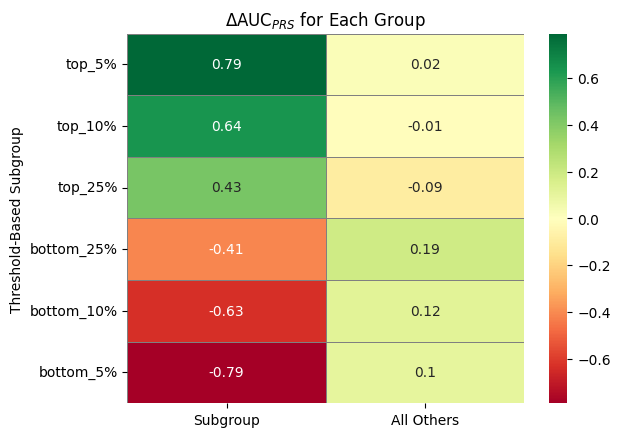

In [79]:
pro_all.get_auc_heatmap()

In [80]:
# pro_all.get_auc_heatmap_alt()

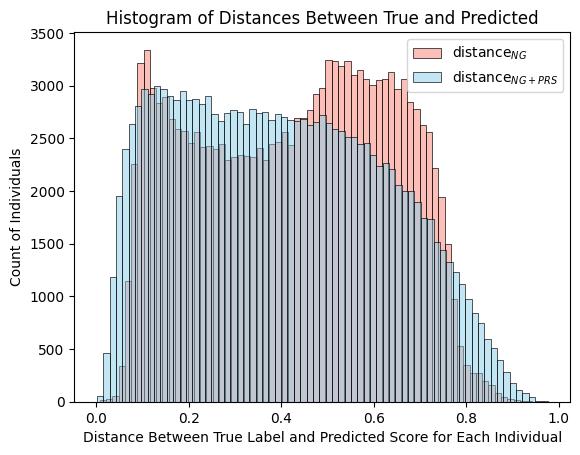

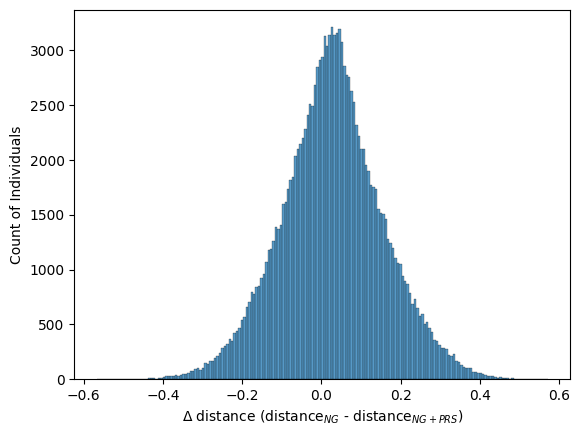

In [81]:
pro_all.get_distplot()

                Group Min Delta Dist Max Delta Dist
0              top_5%         0.2451         0.5718
1       top_5%_others        -0.5668         0.2451
2             top_10%          0.193         0.5718
3      top_10%_others        -0.5668          0.193
4             top_25%         0.1077         0.5718
5      top_25%_others        -0.5668         0.1077
6          bottom_25%        -0.5668         -0.053
7   bottom_25%_others         -0.053         0.5718
8          bottom_10%        -0.5668        -0.1348
9   bottom_10%_others        -0.1348         0.5718
10          bottom_5%        -0.5668        -0.1844
11   bottom_5%_others        -0.1844         0.5718


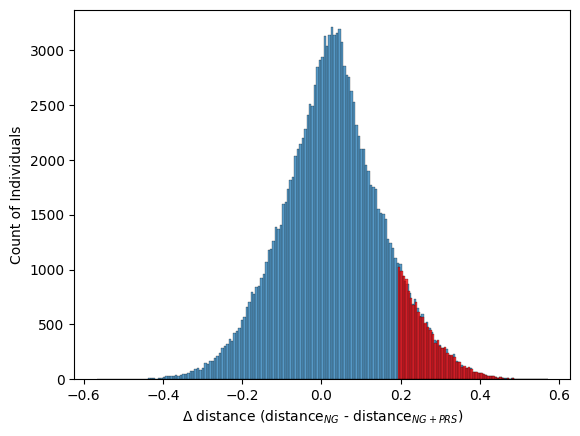

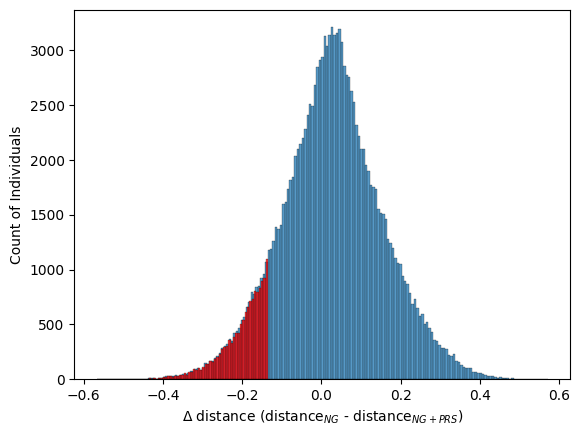

In [82]:
pro_all.get_subgroup_ranges(combined_figure=False)

In [83]:
casecontrol_results, casecontrol_comparison_stats = pro_all.casecontrol_comparisons_wrapper(
    data_modalities=["datafields", "diagnoses", "medications"],
                        alpha=0.01, features_dict=features_dict)

Subgroup: top_5%
Group 1: cases vs. controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 370.17it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:06<00:00, 393.04it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:00<00:00, 413.52it/s]


Total Features: 3257
Subgroup: top_10%
Group 1: cases vs. controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 343.51it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:06<00:00, 403.87it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:00<00:00, 405.69it/s]


Total Features: 3257
Subgroup: top_25%
Group 1: cases vs. controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 321.89it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:07<00:00, 371.49it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:00<00:00, 387.63it/s]


Total Features: 3257
Subgroup: bottom_25%
Group 1: cases vs. controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 324.64it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:06<00:00, 387.29it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:00<00:00, 389.28it/s]


Total Features: 3257
Subgroup: bottom_10%
Group 1: cases vs. controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 345.39it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:06<00:00, 405.73it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:00<00:00, 403.87it/s]


Total Features: 3257
Subgroup: bottom_5%
Group 1: cases vs. controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 371.70it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:06<00:00, 406.91it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:00<00:00, 413.20it/s]


Total Features: 3257
Subgroup: Middle 80%
Group 1: cases vs. controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 276.82it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 303.07it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 313.48it/s]

Total Features: 3257


In [84]:
all_results, all_comparison_stats = pro_all.comparisons_wrapper(
    data_modalities=["datafields", "diagnoses", "medications"],
                        alpha=0.01, features_dict=features_dict)

Subgroup: top_5%
Group 1: all, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 271.37it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 311.30it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 312.07it/s]


Total Features: 3257
Group 1: cases, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 284.33it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 319.34it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 324.68it/s]


Total Features: 3257
Group 1: controls, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 273.86it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 301.98it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 314.24it/s]


Total Features: 3257
Group 1: cases, Group 2: cases
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 382.60it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:06<00:00, 412.21it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:00<00:00, 416.51it/s]


Total Features: 3257
Group 1: cases, Group 2: controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 282.12it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 321.94it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 327.57it/s]


Total Features: 3257
Group 1: controls, Group 2: controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 269.60it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 303.71it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 316.82it/s]


Total Features: 3257
Subgroup: top_10%
Group 1: all, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 262.34it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 314.34it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 316.05it/s]


Total Features: 3257
Group 1: cases, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 281.63it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 324.54it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 324.75it/s]


Total Features: 3257
Group 1: controls, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 264.95it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 303.24it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 316.67it/s]


Total Features: 3257
Group 1: cases, Group 2: cases
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 381.70it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:06<00:00, 411.87it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:00<00:00, 416.83it/s]


Total Features: 3257
Group 1: cases, Group 2: controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 285.60it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 329.51it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 327.93it/s]


Total Features: 3257
Group 1: controls, Group 2: controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 262.21it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 315.29it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 317.47it/s]


Total Features: 3257
Subgroup: top_25%
Group 1: all, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 254.15it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 300.15it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 313.79it/s]


Total Features: 3257
Group 1: cases, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 287.23it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:07<00:00, 332.94it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 333.53it/s]


Total Features: 3257
Group 1: controls, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 255.28it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 312.19it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 315.12it/s]


Total Features: 3257
Group 1: cases, Group 2: cases
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 382.44it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:06<00:00, 394.87it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:00<00:00, 413.74it/s]


Total Features: 3257
Group 1: cases, Group 2: controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 292.61it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:07<00:00, 338.05it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 338.84it/s]


Total Features: 3257
Group 1: controls, Group 2: controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 258.58it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 316.96it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 317.46it/s]


Total Features: 3257
Subgroup: bottom_25%
Group 1: all, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 254.41it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 300.87it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 314.59it/s]


Total Features: 3257
Group 1: cases, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 289.24it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:07<00:00, 335.69it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 336.78it/s]


Total Features: 3257
Group 1: controls, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 255.18it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 313.87it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 312.94it/s]


Total Features: 3257
Group 1: cases, Group 2: cases
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 376.38it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:06<00:00, 405.64it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:00<00:00, 415.50it/s]


Total Features: 3257
Group 1: cases, Group 2: controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 293.42it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:07<00:00, 331.18it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 340.93it/s]


Total Features: 3257
Group 1: controls, Group 2: controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 259.89it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 317.89it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 318.49it/s]


Total Features: 3257
Subgroup: bottom_10%
Group 1: all, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 256.59it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 312.21it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 315.08it/s]


Total Features: 3257
Group 1: cases, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 287.14it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 316.10it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 329.32it/s]


Total Features: 3257
Group 1: controls, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 265.87it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 315.07it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 316.21it/s]


Total Features: 3257
Group 1: cases, Group 2: cases
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 374.75it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:06<00:00, 411.09it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:00<00:00, 417.36it/s]


Total Features: 3257
Group 1: cases, Group 2: controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 284.99it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 317.73it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 332.91it/s]


Total Features: 3257
Group 1: controls, Group 2: controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 266.21it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 318.39it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 319.54it/s]


Total Features: 3257
Subgroup: bottom_5%
Group 1: all, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 268.89it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 310.82it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 311.64it/s]


Total Features: 3257
Group 1: cases, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 276.30it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 314.10it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 326.57it/s]


Total Features: 3257
Group 1: controls, Group 2: all
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 268.29it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 311.24it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 315.39it/s]


Total Features: 3257
Group 1: cases, Group 2: cases
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 382.69it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:06<00:00, 413.24it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:00<00:00, 416.30it/s]


Total Features: 3257
Group 1: cases, Group 2: controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 287.31it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 321.57it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 326.22it/s]


Total Features: 3257
Group 1: controls, Group 2: controls
Data Modality: datafields


100%|████████████████████████████████████████| 237/237 [00:00<00:00, 273.04it/s]


Data Modality: diagnoses


100%|██████████████████████████████████████| 2642/2642 [00:08<00:00, 303.69it/s]


Data Modality: medications


100%|████████████████████████████████████████| 378/378 [00:01<00:00, 316.31it/s]

Total Features: 3257


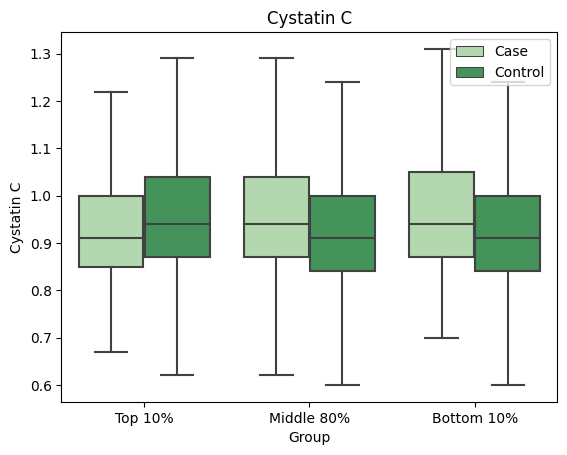

In [85]:
# Get a barplot of any feature
pro_all.get_feature_distribution(features_dict, feature_code="Cystatin C",
                        feature_name="Cystatin C", units="", by_status=True, anchor=False)

['Waist circumference', 'Cholesterol', 'Cystatin C', 'Lipoprotein A', 'Testosterone', 'BC_77', 'BC_313', 'BC_5k']
[[ 1.00000000e+00 -9.82375274e-02  3.22056590e-01 -8.38771443e-04
   3.02755531e-01 -2.47673399e-04 -8.39697564e-05  7.82105430e-03]
 [-9.82375274e-02  1.00000000e+00 -6.55837289e-02  4.80072914e-02
  -1.28800927e-01 -1.18792181e-02 -5.79573788e-03 -1.78528813e-02]
 [ 3.22056590e-01 -6.55837289e-02  1.00000000e+00 -3.87455584e-04
   1.45699465e-01 -1.27192701e-02 -8.62540745e-03 -1.43952429e-02]
 [-8.38771443e-04  4.80072914e-02 -3.87455584e-04  1.00000000e+00
  -1.12638250e-02  1.27955260e-02  3.56523468e-03  2.11583828e-02]
 [ 3.02755531e-01 -1.28800927e-01  1.45699465e-01 -1.12638250e-02
   1.00000000e+00  4.01151180e-04 -3.73603889e-04 -1.21194894e-03]
 [-2.47673399e-04 -1.18792181e-02 -1.27192701e-02  1.27955260e-02
   4.01151180e-04  1.00000000e+00  6.13434622e-01  5.55654876e-01]
 [-8.39697564e-05 -5.79573788e-03 -8.62540745e-03  3.56523468e-03
  -3.73603889e-04  6.1

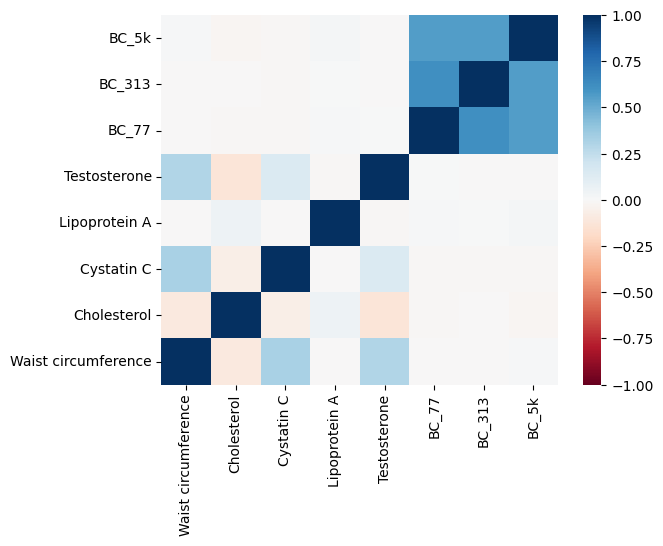

In [86]:
# Get all correlations between features
# pd.set_option('display.float_format', '{:.5g}'.format)
pro_all.get_feature_correlations(features_dict,
                                 feature_codes_list=["Cholesterol", "Cystatin C",
                                                     "Lipoprotein A", "Testosterone",
                                                     "Waist circumference", 
                                                     "BC_5k", "BC_313", "BC_77"], get_figure=True, subgroup="all")

In [87]:
# pd.set_option('display.float_format', '{:.5g}'.format)
pro_all.get_feature_correlation_binary(features_dict,
                                binary_feature="Sex - f.31.0.0_Male",
                                numerical_feature="Testosterone",
                                subgroup="top_10%")

        UKB ID  Sex - f.31.0.0_Male  Testosterone    Label  NG_Score  \
0      4893217                  1.0          8.21     Case  0.569304   
1      4299433                  1.0         17.66  Control  0.288372   
2      2798681                  1.0          5.81  Control  0.645607   
3      3960906                  1.0         11.56  Control  0.532790   
4      3512235                  1.0         10.62  Control  0.518650   
...        ...                  ...           ...      ...       ...   
14249  4879667                  1.0         23.64  Control  0.619272   
14250  3744917                  1.0          7.12  Control  0.785408   
14251  5043135                  1.0         19.03  Control  0.615968   
14252  4275651                  1.0          8.80  Control  0.500227   
14253  2637602                  1.0         13.80  Control  0.445595   

       NG+PRS_Score  NGvsNG+PRS_Diff  NGvsNG+PRS_Diff_pct    Group  
0          0.914567         0.345263             0.991194  Top 10%

/home/andrewhornback/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [88]:
pro_all.comparison_stats

,index,Main Group Sample Size,All Others Sample Size,Number of Features,Data Modality,Comparison,Subgroup
0,0,7122,134742,237,datafields,Main Group: all; All Others: all,top_5%
1,0,7122,134742,2642,diagnoses,Main Group: all; All Others: all,top_5%
2,0,7122,134742,378,medications,Main Group: all; All Others: all,top_5%
3,0,255,134742,237,datafields,Main Group: cases; All Others: all,top_5%
4,0,255,134742,2642,diagnoses,Main Group: cases; All Others: all,top_5%
...,...,...,...,...,...,...,...
103,0,245,130090,2642,diagnoses,Main Group: cases; All Others: controls,bottom_5%
104,0,245,130090,378,medications,Main Group: cases; All Others: controls,bottom_5%
105,0,6853,130090,237,datafields,Main Group: controls; All Others: controls,bottom_5%
106,0,6853,130090,2642,diagnoses,Main Group: controls; All Others: controls,bottom_5%


In [89]:
#pac_all.results_dict

Get more information by looking at self.casecontrol_results_dict
Top 10% Significant Features Not in Bottom 10%
These features do not overlap; they are not significant in the bottom 10%
Lowest p-values
   index Feature Numerical  Group 1 Mean  Group 1 Std  Group 2 Mean  \
0   2334    S601     False      0.009191     0.095429      0.000875   

   Group 2 Std   p-value  Cohen's value  All Mean   All Std Data Modality  \
0     0.029572  0.000001       0.132858  0.000712  0.026678     diagnoses   

   Cohens abs  
0   -0.132858  
['S601']
Highest Effect Sizes
   index Feature Numerical  Group 1 Mean  Group 1 Std  Group 2 Mean  \
0   2334    S601     False      0.009191     0.095429      0.000875   

   Group 2 Std   p-value  Cohen's value  All Mean   All Std Data Modality  \
0     0.029572  0.000001       0.132858  0.000712  0.026678     diagnoses   

   Cohens abs  
0   -0.132858  
['S601']
Bottom 10% Significant Features Not in Top 10%
These features do not overlap; they are not signific

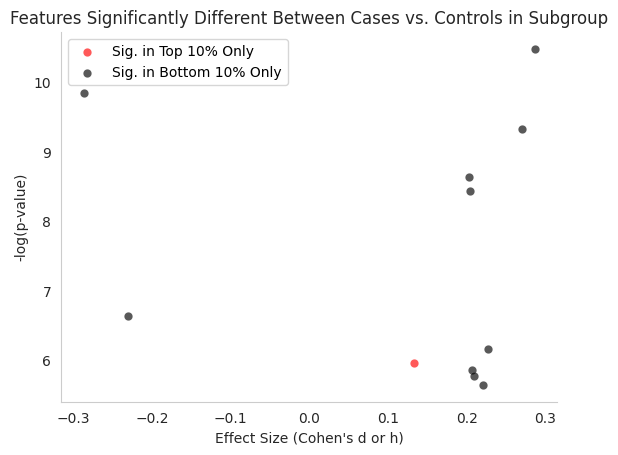

In [90]:
# Get a scatterplot of case vs. control features (in one but not in the other)
"""
bc_all.get_scatterplot(effectsize_num=60, pvalues_num=60, feature_names_dict=None, to_use=[
    'E780', 'Smoking status - f.20116.0.0_Current',
    'Illnesses of siblings - f.20111_Sibling_Heart disease',
    'atorvastatin', 'E78', 'Block E70-E90', 'Systolic blood pressure, automated reading - f.4080.0.0',
    'Age at recruitment', 'Medication for cholesterol, blood pressure or diabetes - f.6177_Blood pressure medication',
    'Waist circumference', 'HDL cholesterol',
    'Medication for cholesterol, blood pressure or diabetes - f.6177_Cholesterol lowering medication',
    'Urate', 'Medication for cholesterol, blood pressure or diabetes - f.6177_Insulin',
    'HDL cholesterol',
    'Creatinine', 'Block K20-K31', 'Medication for pain relief, constipation, heartburn - f.6154_None of the above',
    'Medication for pain relief, constipation, heartburn - f.6154_Omeprazole (e.g. Zanprol)'

])
"""
# Added x_dist to change the text to point location
# Added fontsize with default 5
pro_all.get_scatterplot(effectsize_num=60, pvalues_num=60, feature_names_dict={
    "M1999": "M19.99", "H534": "H53.4", "K221": "K22.1", 
    "Illnesses of father - f.20107_Father_Bowel cancer": "Family Hx of Bowel Cancer (Father)",
    "Illnesses of mother - f.20110_Mother_Bowel cancer": "Family Hx of Bowel Cancer (Mother)",
    "Illnesses of mother - f.20110_Mother_Lung cancer": "Family Hx of Lung Cancer (Mother)",
    "coracten sr 10mg m/r capsule": "coracten capsule"
}, to_use=["M1999", "H534", "K221", 
    "Illnesses of father - f.20107_Father_Bowel cancer",
    "Illnesses of mother - f.20110_Mother_Bowel cancer",
    "Illnesses of mother - f.20110_Mother_Lung cancer",
           "M00", "microgynon 30 tablet", "hydrocortisone",
           "venlafaxine", "K20","Block K20-K31"
    
], show_full_tables=True, x_dist=0.01, fontsize=6)

In [91]:
pro_all.results_dict.keys()

dict_keys(['top_5%', 'top_10%', 'top_25%', 'bottom_25%', 'bottom_10%', 'bottom_5%'])

In [92]:
# pac_all.all_stats

In [93]:
#Loop pro_all dict and save all results
for x in pro_all.results_dict.keys():
    for y in pro_all.results_dict[x].keys():
        pro_all.results_dict[x][y]['sig_results']["Subgroup"] = x
        pro_all.results_dict[x][y]['sig_results']["Main Group"] = y.split(':')[1].split(';')[0].strip()
        pro_all.results_dict[x][y]['sig_results']["All Others"] = y.split(':', 2)[2].strip()
        pro_all.results_dict[x][y]['sig_results'].to_csv(f"PRO All Results - {x} - {y.replace(':','')}.csv", index=False)

## PRO Top 10% Cases Vs All Other Cases

In [94]:
pro_all.results_dict["top_10%"]["Main Group: cases; All Others: cases"]['sig_results']

,Feature,Numerical,Group 1 Mean,Group 1 Std,Group 2 Mean,Group 2 Std,p-value,Cohen's value,All Mean,All Std,Data Modality,Cohens abs,Subgroup,Main Group,All Others
229,PRO_269,True,22.170617,0.389596,20.765447,0.669713,0.000000e+00,2.564837,20.482921,0.803822,datafields,-2.564837,top_10%,cases,cases
228,PRO_147,True,11.265489,0.514175,10.464680,0.597894,8.638297e-151,1.436152,10.249704,0.658199,datafields,-1.436152,top_10%,cases,cases
227,PRO_103,True,3.193472,0.574751,2.381336,0.640599,9.715954e-133,1.334507,2.167950,0.712813,datafields,-1.334507,top_10%,cases,cases
230,PRO_6M,True,-0.253308,0.143557,-0.400454,0.148135,2.476589e-84,1.008791,-0.459111,0.160599,datafields,-1.008791,top_10%,cases,cases
95,Age at recruitment,True,59.878676,4.901604,62.836418,4.994968,8.526693e-36,-0.597704,56.528625,8.095182,datafields,-0.597704,top_10%,cases,cases


In [95]:
pro_all.all_stats['top_10%']

,Metric,NG,NG+PRS,NG+PRS - NG
0,AUC,0.349016,0.992596,0.643581
1,Accuracy,0.298162,0.942192,0.644030
2,Balanced Accuracy,0.411847,0.948765,0.536918
3,F1,0.054978,0.557940,0.502962
4,Precision,0.028978,0.393939,0.364961
5,Recall,0.534926,0.955882,0.420956
6,TN,3959.000000,12910.000000,8951.000000
7,FP,9751.000000,800.000000,-8951.000000
8,FN,253.000000,24.000000,-229.000000
9,TP,291.000000,520.000000,229.000000


In [96]:
pro_all.all_stats['top_10%_others']

,Metric,NG,NG+PRS,NG+PRS - NG
0,AUC,0.745090,0.736664,-0.008426
1,Accuracy,0.617130,0.623736,0.006606
2,Balanced Accuracy,0.690598,0.667796,-0.022802
3,F1,0.121164,0.115339,-0.005826
4,Precision,0.065759,0.062728,-0.003031
5,Recall,0.769477,0.715102,-0.054375
6,TN,75384.000000,76465.000000,1081.000000
7,FP,47849.000000,46768.000000,-1081.000000
8,FN,1009.000000,1247.000000,238.000000
9,TP,3368.000000,3130.000000,-238.000000


## PRO Top 10% Cases Vs All Other Controls

In [97]:
pro_all.results_dict["top_10%"]["Main Group: cases; All Others: controls"]['sig_results']

,Feature,Numerical,Group 1 Mean,Group 1 Std,Group 2 Mean,Group 2 Std,p-value,Cohen's value,All Mean,All Std,Data Modality,Cohens abs,Subgroup,Main Group,All Others
229,PRO_269,True,22.170617,0.389596,20.574033,0.698159,0.000000e+00,2.824129,20.482921,0.803822,datafields,-2.824129,top_10%,cases,controls
228,PRO_147,True,11.265489,0.514175,10.294029,0.611702,8.345389e-182,1.719256,10.249704,0.658199,datafields,-1.719256,top_10%,cases,controls
227,PRO_103,True,3.193472,0.574751,2.197689,0.652322,5.487909e-166,1.619788,2.167950,0.712813,datafields,-1.619788,top_10%,cases,controls
230,PRO_6M,True,-0.253308,0.143557,-0.455455,0.150726,4.494947e-131,1.373419,-0.459111,0.160599,datafields,-1.373419,top_10%,cases,controls
95,Age at recruitment,True,59.878676,4.901604,56.396793,8.130679,7.441581e-50,0.518664,56.528625,8.095182,datafields,-0.518664,top_10%,cases,controls
2334,S601,False,0.009191,0.095429,0.000844,0.029038,5.717113e-09,0.133927,0.000712,0.026678,diagnoses,-0.133927,top_10%,cases,controls


## PRO Top 10% Controls Vs All Other Controls

In [98]:
pro_all.results_dict["top_10%"]["Main Group: controls; All Others: controls"]['sig_results']

,Feature,Numerical,Group 1 Mean,Group 1 Std,Group 2 Mean,Group 2 Std,p-value,Cohen's value,All Mean,All Std,Data Modality,Cohens abs,Subgroup,Main Group,All Others
229,PRO_269,True,19.217308,0.372295,20.574033,0.698159,0.000000,-2.424986,20.482921,0.803822,datafields,-2.424986,top_10%,controls,controls
228,PRO_147,True,9.520839,0.497193,10.294029,0.611702,0.000000,-1.387147,10.249704,0.658199,datafields,-1.387147,top_10%,controls,controls
227,PRO_103,True,1.415351,0.544724,2.197689,0.652322,0.000000,-1.301867,2.167950,0.712813,datafields,-1.301867,top_10%,controls,controls
230,PRO_6M,True,-0.601621,0.135280,-0.455455,0.150726,0.000000,-1.020637,-0.459111,0.160599,datafields,-1.020637,top_10%,controls,controls
95,Age at recruitment,True,62.373377,4.238682,56.396793,8.130679,0.000000,0.921799,56.528625,8.095182,datafields,-0.921799,top_10%,controls,controls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Block L80-L99,False,0.079431,0.270410,0.068577,0.252734,0.000002,0.041488,0.067641,0.251128,diagnoses,-0.041488,top_10%,controls,controls
132,quinine,False,0.009117,0.095049,0.005770,0.075738,0.000002,0.039200,0.006607,0.081013,medications,-0.039200,top_10%,controls,controls
584,E109,False,0.015098,0.121945,0.010630,0.102554,0.000003,0.039801,0.008352,0.091006,diagnoses,-0.039801,top_10%,controls,controls
286,Block I95-I99,False,0.009847,0.098741,0.006362,0.079508,0.000003,0.039096,0.006253,0.078828,diagnoses,-0.039096,top_10%,controls,controls


In [99]:
pro_all.results_dict["top_10%"]["Main Group: controls; All Others: controls"]['sig_results'].head(25)

,Feature,Numerical,Group 1 Mean,Group 1 Std,Group 2 Mean,Group 2 Std,p-value,Cohen's value,All Mean,All Std,Data Modality,Cohens abs,Subgroup,Main Group,All Others
229,PRO_269,True,19.217308,0.372295,20.574033,0.698159,0.000000e+00,-2.424986,20.482921,0.803822,datafields,-2.424986,top_10%,controls,controls
228,PRO_147,True,9.520839,0.497193,10.294029,0.611702,0.000000e+00,-1.387147,10.249704,0.658199,datafields,-1.387147,top_10%,controls,controls
227,PRO_103,True,1.415351,0.544724,2.197689,0.652322,0.000000e+00,-1.301867,2.167950,0.712813,datafields,-1.301867,top_10%,controls,controls
230,PRO_6M,True,-0.601621,0.135280,-0.455455,0.150726,0.000000e+00,-1.020637,-0.459111,0.160599,datafields,-1.020637,top_10%,controls,controls
95,Age at recruitment,True,62.373377,4.238682,56.396793,8.130679,0.000000e+00,0.921799,56.528625,8.095182,datafields,-0.921799,top_10%,controls,controls
217,"Medication for cholesterol, blood pressure or ...",False,0.535522,0.498737,0.650467,0.476822,1.402486e-155,-0.234569,0.296860,0.456875,datafields,-0.234569,top_10%,controls,controls
218,"Medication for cholesterol, blood pressure or ...",False,0.342086,0.474408,0.248984,0.432424,2.642950e-123,0.204619,0.111600,0.314873,datafields,-0.204619,top_10%,controls,controls
219,"Medication for cholesterol, blood pressure or ...",False,0.333406,0.471430,0.241875,0.428219,1.824363e-121,0.202784,0.104033,0.305304,datafields,-0.202784,top_10%,controls,controls
122,SHBG,True,43.846265,15.946153,40.748501,15.989809,7.876715e-102,0.193998,51.629537,25.574484,datafields,-0.193998,top_10%,controls,controls
113,Cystatin C,True,0.970431,0.178618,0.936865,0.163648,5.158523e-97,0.195953,0.907640,0.170437,datafields,-0.195953,top_10%,controls,controls


## PRO Top 25% Cases Vs All Other Cases

In [100]:
pro_all.results_dict["top_25%"]["Main Group: cases; All Others: cases"]['sig_results']

,Feature,Numerical,Group 1 Mean,Group 1 Std,Group 2 Mean,Group 2 Std,p-value,Cohen's value,All Mean,All Std,Data Modality,Cohens abs,Subgroup,Main Group,All Others
229,PRO_269,True,21.797254,0.430785,20.536110,0.557622,0.000000e+00,2.531118,20.482921,0.803822,datafields,-2.531118,top_25%,cases,cases
228,PRO_147,True,11.058293,0.524239,10.331530,0.555487,0.000000e+00,1.345637,10.249704,0.658199,datafields,-1.345637,top_25%,cases,cases
227,PRO_103,True,2.987811,0.574515,2.244343,0.597994,1.310362e-294,1.267911,2.167950,0.712813,datafields,-1.267911,top_25%,cases,cases
230,PRO_6M,True,-0.292842,0.142475,-0.424278,0.142293,3.640076e-170,0.923108,-0.459111,0.160599,datafields,-0.923108,top_25%,cases,cases
95,Age at recruitment,True,61.485010,5.116817,62.959064,4.983665,1.374397e-20,-0.291853,56.528625,8.095182,datafields,-0.291853,top_25%,cases,cases
168,Illnesses of siblings - f.20111_Sibling_Prosta...,False,0.013991,0.117452,0.040936,0.198141,1.547217e-06,-0.170345,0.012822,0.112506,datafields,-0.170345,top_25%,cases,cases


In [101]:
pro_all.all_stats['top_25%']

,Metric,NG,NG+PRS,NG+PRS - NG
0,AUC,0.542287,0.968535,0.426248
1,Accuracy,0.425143,0.854084,0.428941
2,Balanced Accuracy,0.541004,0.887525,0.346520
3,F1,0.089325,0.348492,0.259168
4,Precision,0.047865,0.214739,0.166874
5,Recall,0.667555,0.924051,0.256496
6,TN,14108.000000,28968.000000,14860.000000
7,FP,19932.000000,5072.000000,-14860.000000
8,FN,499.000000,114.000000,-385.000000
9,TP,1002.000000,1387.000000,385.000000


In [102]:
pro_all.all_stats['top_25%_others']

,Metric,NG,NG+PRS,NG+PRS - NG
0,AUC,0.764946,0.676955,-0.087992
1,Accuracy,0.638545,0.589430,-0.049114
2,Balanced Accuracy,0.705424,0.624362,-0.081061
3,F1,0.121477,0.093941,-0.027535
4,Precision,0.065890,0.050560,-0.015330
5,Recall,0.776901,0.661696,-0.115205
6,TN,65235.000000,60407.000000,-4828.000000
7,FP,37668.000000,42496.000000,4828.000000
8,FN,763.000000,1157.000000,394.000000
9,TP,2657.000000,2263.000000,-394.000000


## PRO Top 25% Cases Vs All Other Controls

In [103]:
pro_all.results_dict["top_25%"]["Main Group: cases; All Others: controls"]['sig_results']

,Feature,Numerical,Group 1 Mean,Group 1 Std,Group 2 Mean,Group 2 Std,p-value,Cohen's value,All Mean,All Std,Data Modality,Cohens abs,Subgroup,Main Group,All Others
229,PRO_269,True,21.797254,0.430785,20.736107,0.636201,0.000000e+00,1.953190,20.482921,0.803822,datafields,-1.953190,top_25%,cases,controls
228,PRO_147,True,11.058293,0.524239,10.386704,0.591248,4.790856e-319,1.201952,10.249704,0.658199,datafields,-1.201952,top_25%,cases,controls
227,PRO_103,True,2.987811,0.574515,2.291627,0.632891,1.126202e-296,1.151843,2.167950,0.712813,datafields,-1.151843,top_25%,cases,controls
95,Age at recruitment,True,61.485010,5.116817,55.757675,8.353853,5.178614e-266,0.826805,56.528625,8.095182,datafields,-0.826805,top_25%,cases,controls
230,PRO_6M,True,-0.292842,0.142475,-0.437721,0.147618,5.793677e-233,0.998683,-0.459111,0.160599,datafields,-0.998683,top_25%,cases,controls
217,"Medication for cholesterol, blood pressure or ...",False,0.554297,0.497043,0.661584,0.473171,3.817769e-18,-0.220267,0.296860,0.456875,datafields,-0.220267,top_25%,cases,controls
218,"Medication for cholesterol, blood pressure or ...",False,0.331779,0.470852,0.240819,0.427581,4.055319e-16,0.201798,0.111600,0.314873,datafields,-0.201798,top_25%,cases,controls
1036,I10,False,0.205863,0.404331,0.143553,0.350636,1.197496e-11,0.164694,0.122129,0.327435,diagnoses,-0.164694,top_25%,cases,controls
219,"Medication for cholesterol, blood pressure or ...",False,0.307795,0.461581,0.233229,0.422887,1.578078e-11,0.168213,0.104033,0.305304,datafields,-0.168213,top_25%,cases,controls
353,Block R70-R79,False,0.065290,0.247037,0.033556,0.180083,2.697773e-11,0.148323,0.027686,0.164071,diagnoses,-0.148323,top_25%,cases,controls


In [104]:
pro_all.results_dict["top_25%"]["Main Group: cases; All Others: controls"]['sig_results'].to_csv("PRO 269 - T25 Cases vs Controls.csv", index=False)

## PRO Bottom 5% Cases Vs All Other Cases

In [105]:
pro_all.results_dict["bottom_5%"]["Main Group: cases; All Others: cases"]['sig_results'].head(25)

,Feature,Numerical,Group 1 Mean,Group 1 Std,Group 2 Mean,Group 2 Std,p-value,Cohen's value,All Mean,All Std,Data Modality,Cohens abs,Subgroup,Main Group,All Others
229,PRO_269,True,19.364658,0.304449,21.002317,0.709529,5.555324e-236,-2.999659,20.482921,0.803822,datafields,-2.999659,bottom_5%,cases,cases
228,PRO_147,True,9.719171,0.482023,10.596906,0.617418,8.207153e-82,-1.584722,10.249704,0.658199,datafields,-1.584722,bottom_5%,cases,cases
227,PRO_103,True,1.563978,0.538252,2.518645,0.655937,2.736744e-79,-1.591147,2.167950,0.712813,datafields,-1.591147,bottom_5%,cases,cases
230,PRO_6M,True,-0.538656,0.138480,-0.376094,0.151190,1.156555e-47,-1.121315,-0.459111,0.160599,datafields,-1.121315,bottom_5%,cases,cases
95,Age at recruitment,True,63.942857,3.412582,62.434346,5.131397,2.743197e-10,0.346181,56.528625,8.095182,datafields,-0.346181,bottom_5%,cases,cases
1760,M259,False,0.020408,0.141392,0.001497,0.038662,2.150001e-07,0.209293,0.001434,0.037847,diagnoses,-0.209293,bottom_5%,cases,cases


In [106]:
pro_all.all_stats['bottom_5%']

,Metric,NG,NG+PRS,NG+PRS - NG
0,AUC,0.878427,0.088424,-0.790002
1,Accuracy,0.721753,0.218090,-0.503663
2,Balanced Accuracy,0.796867,0.166075,-0.630792
3,F1,0.178794,0.009636,-0.169158
4,Precision,0.099537,0.005038,-0.094499
5,Recall,0.877551,0.110204,-0.767347
6,TN,4908.000000,1521.000000,-3387.000000
7,FP,1945.000000,5332.000000,3387.000000
8,FN,30.000000,218.000000,188.000000
9,TP,215.000000,27.000000,-188.000000


In [107]:
pro_all.all_stats['bottom_5%_others']

,Metric,NG,NG+PRS,NG+PRS - NG
0,AUC,0.704208,0.800762,0.096554
1,Accuracy,0.577883,0.678784,0.100901
2,Balanced Accuracy,0.654354,0.725070,0.070716
3,F1,0.108005,0.143386,0.035381
4,Precision,0.058275,0.079003,0.020728
5,Recall,0.736527,0.774808,0.038281
6,TN,74435.000000,87854.000000,13419.000000
7,FP,55655.000000,42236.000000,-13419.000000
8,FN,1232.000000,1053.000000,-179.000000
9,TP,3444.000000,3623.000000,179.000000


## PRO Bottom 5% Cases Vs All Other Controls

In [108]:
pro_all.results_dict["bottom_5%"]["Main Group: cases; All Others: controls"]['sig_results'].head(25)

,Feature,Numerical,Group 1 Mean,Group 1 Std,Group 2 Mean,Group 2 Std,p-value,Cohen's value,All Mean,All Std,Data Modality,Cohens abs,Subgroup,Main Group,All Others
229,PRO_269,True,19.364658,0.304449,20.355874,0.713726,4.857196e-133,-1.806556,20.482921,0.803822,datafields,-1.806556,bottom_5%,cases,controls
95,Age at recruitment,True,63.942857,3.412582,57.037274,8.114520,1.034099e-88,1.109403,56.528625,8.095182,datafields,-1.109403,bottom_5%,cases,controls
227,PRO_103,True,1.563978,0.538252,2.071081,0.655378,1.694048e-35,-0.845622,2.167950,0.712813,datafields,-0.845622,bottom_5%,cases,controls
228,PRO_147,True,9.719171,0.482023,10.169025,0.614773,5.041884e-35,-0.814362,10.249704,0.658199,datafields,-0.814362,bottom_5%,cases,controls
230,PRO_6M,True,-0.538656,0.138480,-0.479293,0.151047,1.514802e-10,-0.409681,-0.459111,0.160599,datafields,-0.409681,bottom_5%,cases,controls
1760,M259,False,0.020408,0.141392,0.001822,0.042644,1.870140e-09,0.201304,0.001434,0.037847,diagnoses,-0.201304,bottom_5%,cases,controls
2197,R798,False,0.053061,0.224156,0.012837,0.112572,1.234826e-07,0.237784,0.008016,0.089171,diagnoses,-0.237784,bottom_5%,cases,controls
2195,R79,False,0.057143,0.232115,0.014797,0.120741,1.932060e-07,0.238872,0.011093,0.104739,diagnoses,-0.238872,bottom_5%,cases,controls
265,tamsulosin,False,0.061224,0.239742,0.018464,0.134622,2.364607e-06,0.227457,0.008022,0.089203,medications,-0.227457,bottom_5%,cases,controls


## PRO Bottom 5% Controls Vs All Other Controls

In [109]:
pro_all.results_dict["bottom_5%"]["Main Group: controls; All Others: controls"]['sig_results'].head(25)

,Feature,Numerical,Group 1 Mean,Group 1 Std,Group 2 Mean,Group 2 Std,p-value,Cohen's value,All Mean,All Std,Data Modality,Cohens abs,Subgroup,Main Group,All Others
229,PRO_269,True,22.001072,0.339027,20.355874,0.713726,0.000000e+00,2.944563,20.482921,0.803822,datafields,-2.944563,bottom_5%,controls,controls
228,PRO_147,True,11.120151,0.515318,10.169025,0.614773,0.000000e+00,1.676794,10.249704,0.658199,datafields,-1.676794,bottom_5%,controls,controls
227,PRO_103,True,3.035945,0.556317,2.071081,0.655378,0.000000e+00,1.587290,2.167950,0.712813,datafields,-1.587290,bottom_5%,controls,controls
230,PRO_6M,True,-0.295344,0.135494,-0.479293,0.151047,0.000000e+00,1.282038,-0.459111,0.160599,datafields,-1.282038,bottom_5%,controls,controls
95,Age at recruitment,True,56.195243,6.197757,57.037274,8.114520,7.202505e-27,-0.116624,56.528625,8.095182,datafields,-0.116624,bottom_5%,controls,controls
15,Family relationship satisfaction - f.4559.0.0_...,False,0.089450,0.285392,0.071020,0.256858,9.992184e-09,0.067949,0.067460,0.250817,datafields,-0.067949,bottom_5%,controls,controls
98,"Diastolic blood pressure, automated reading - ...",True,84.650308,10.079574,83.944545,10.111090,1.679837e-08,0.069910,82.206166,10.329126,datafields,-0.069910,bottom_5%,controls,controls
175,Sleep duration - f.1160.0.0,True,7.069305,1.055571,7.140158,1.079576,6.522624e-08,-0.066364,7.154172,1.106697,datafields,-0.066364,bottom_5%,controls,controls
74,Average total household income before tax - f....,False,0.154823,0.361736,0.179960,0.384154,1.306197e-07,-0.067377,0.193428,0.394986,datafields,-0.067377,bottom_5%,controls,controls
187,Mouth/teeth dental problems - f.6149_Dentures,False,0.154093,0.361038,0.179184,0.383506,1.312565e-07,-0.067373,0.165587,0.371709,datafields,-0.067373,bottom_5%,controls,controls


## PRO Bottom 10% Cases Vs All Other Cases

In [110]:
pro_all.results_dict["bottom_10%"]["Main Group: cases; All Others: cases"]['sig_results'].head(25)

,Feature,Numerical,Group 1 Mean,Group 1 Std,Group 2 Mean,Group 2 Std,p-value,Cohen's value,All Mean,All Std,Data Modality,Cohens abs,Subgroup,Main Group,All Others
229,PRO_269,True,19.596595,0.329340,21.070545,0.667700,0.000000e+00,-2.799818,20.482921,0.803822,datafields,-2.799818,bottom_10%,cases,cases
228,PRO_147,True,9.825317,0.483458,10.635528,0.602914,2.842603e-152,-1.482654,10.249704,0.658199,datafields,-1.482654,bottom_10%,cases,cases
227,PRO_103,True,1.682603,0.537991,2.560293,0.638837,4.502207e-147,-1.486173,2.167950,0.712813,datafields,-1.486173,bottom_10%,cases,cases
230,PRO_6M,True,-0.517551,0.137570,-0.369105,0.149170,8.037486e-84,-1.034563,-0.459111,0.160599,datafields,-1.034563,bottom_10%,cases,cases
95,Age at recruitment,True,63.428000,3.932533,62.405564,5.173004,1.451791e-07,0.222519,56.528625,8.095182,datafields,-0.222519,bottom_10%,cases,cases


In [111]:
pro_all.all_stats['bottom_10%']

,Metric,NG,NG+PRS,NG+PRS - NG
0,AUC,0.810175,0.176229,-0.633946
1,Accuracy,0.656574,0.280189,-0.376385
2,Balanced Accuracy,0.737225,0.253122,-0.484103
3,F1,0.144815,0.021491,-0.123325
4,Precision,0.079383,0.011287,-0.068097
5,Recall,0.824000,0.224000,-0.600000
6,TN,8891.000000,3858.000000,-5033.000000
7,FP,4778.000000,9811.000000,5033.000000
8,FN,88.000000,388.000000,300.000000
9,TP,412.000000,112.000000,-300.000000


In [112]:
pro_all.all_stats['bottom_10%_others']

,Metric,NG,NG+PRS,NG+PRS - NG
0,AUC,0.702018,0.826410,0.124392
1,Accuracy,0.577149,0.697404,0.120255
2,Balanced Accuracy,0.652978,0.746993,0.094015
3,F1,0.107357,0.154782,0.047425
4,Precision,0.057911,0.085676,0.027765
5,Recall,0.734449,0.800271,0.065822
6,TN,70452.000000,85517.000000,15065.000000
7,FP,52822.000000,37757.000000,-15065.000000
8,FN,1174.000000,883.000000,-291.000000
9,TP,3247.000000,3538.000000,291.000000


## PRO Bottom 10% Cases Vs All Other Controls

In [113]:
pro_all.results_dict["bottom_10%"]["Main Group: cases; All Others: controls"]['sig_results'].head(25)

,Feature,Numerical,Group 1 Mean,Group 1 Std,Group 2 Mean,Group 2 Std,p-value,Cohen's value,All Mean,All Std,Data Modality,Cohens abs,Subgroup,Main Group,All Others
229,PRO_269,True,19.596595,0.329340,20.288842,0.670315,6.936136e-187,-1.310816,20.482921,0.803822,datafields,-1.310816,bottom_10%,cases,controls
95,Age at recruitment,True,63.428000,3.932533,57.021781,8.162488,2.950689e-143,0.999929,56.528625,8.095182,datafields,-0.999929,bottom_10%,cases,controls
227,PRO_103,True,1.682603,0.537991,2.032010,0.639236,6.257967e-40,-0.591426,2.167950,0.712813,datafields,-0.591426,bottom_10%,cases,controls
228,PRO_147,True,9.825317,0.483458,10.130645,0.597694,3.770176e-38,-0.561693,10.249704,0.658199,datafields,-0.561693,bottom_10%,cases,controls
219,"Medication for cholesterol, blood pressure or ...",False,0.380000,0.485386,0.251399,0.433818,5.415385e-11,0.278004,0.104033,0.305304,datafields,-0.278004,bottom_10%,cases,controls
217,"Medication for cholesterol, blood pressure or ...",False,0.500000,0.500000,0.638675,0.480385,1.625340e-10,-0.281034,0.296860,0.456875,datafields,-0.281034,bottom_10%,cases,controls
218,"Medication for cholesterol, blood pressure or ...",False,0.380000,0.485386,0.258700,0.437921,8.998066e-10,0.261255,0.111600,0.314873,datafields,-0.261255,bottom_10%,cases,controls
2197,R798,False,0.044000,0.205095,0.012898,0.112835,3.140665e-09,0.195032,0.008016,0.089171,diagnoses,-0.195032,bottom_10%,cases,controls
2195,R79,False,0.048000,0.213766,0.014861,0.120997,3.624452e-09,0.197340,0.011093,0.104739,diagnoses,-0.197340,bottom_10%,cases,controls
230,PRO_6M,True,-0.517551,0.137570,-0.486636,0.148497,7.617380e-07,-0.215979,-0.459111,0.160599,datafields,-0.215979,bottom_10%,cases,controls


## PRO Bottom 10% Controls Vs All Other Controls

In [114]:
pro_all.results_dict["bottom_10%"]["Main Group: controls; All Others: controls"]['sig_results'].head(25)

,Feature,Numerical,Group 1 Mean,Group 1 Std,Group 2 Mean,Group 2 Std,p-value,Cohen's value,All Mean,All Std,Data Modality,Cohens abs,Subgroup,Main Group,All Others
229,PRO_269,True,21.785233,0.356244,20.288842,0.670315,0.000000e+00,2.787799,20.482921,0.803822,datafields,-2.787799,bottom_10%,controls,controls
228,PRO_147,True,10.991998,0.520882,10.130645,0.597694,0.000000e+00,1.536468,10.249704,0.658199,datafields,-1.536468,bottom_10%,controls,controls
227,PRO_103,True,2.907185,0.558306,2.032010,0.639236,0.000000e+00,1.458293,2.167950,0.712813,datafields,-1.458293,bottom_10%,controls,controls
230,PRO_6M,True,-0.320846,0.137262,-0.486636,0.148497,0.000000e+00,1.159455,-0.459111,0.160599,datafields,-1.159455,bottom_10%,controls,controls
43,Alcohol intake frequency. - f.1558.0.0_Three o...,False,0.293072,0.455171,0.267226,0.442511,1.125017e-10,0.057568,0.229725,0.420656,datafields,-0.057568,bottom_10%,controls,controls
39,Alcohol intake frequency. - f.1558.0.0_Never,False,0.039725,0.195312,0.051008,0.220015,1.012805e-08,-0.054322,0.080875,0.272643,datafields,-0.054322,bottom_10%,controls,controls
15,Family relationship satisfaction - f.4559.0.0_...,False,0.083913,0.277257,0.070615,0.256181,1.262486e-08,0.049845,0.067460,0.250817,datafields,-0.049845,bottom_10%,controls,controls
74,Average total household income before tax - f....,False,0.161460,0.367955,0.180614,0.384698,3.127880e-08,-0.050885,0.193428,0.394986,datafields,-0.050885,bottom_10%,controls,controls
187,Mouth/teeth dental problems - f.6149_Dentures,False,0.161387,0.367888,0.179762,0.383989,1.050807e-07,-0.048868,0.165587,0.371709,datafields,-0.048868,bottom_10%,controls,controls
168,Illnesses of siblings - f.20111_Sibling_Prosta...,False,0.006731,0.081763,0.011811,0.108035,1.235194e-07,-0.053523,0.012822,0.112506,datafields,-0.053523,bottom_10%,controls,controls


## PRO Bottom 25% Cases Vs All Other Cases

In [115]:
pro_all.results_dict["bottom_25%"]["Main Group: cases; All Others: cases"]['sig_results'].head(25)

,Feature,Numerical,Group 1 Mean,Group 1 Std,Group 2 Mean,Group 2 Std,p-value,Cohen's value,All Mean,All Std,Data Modality,Cohens abs,Subgroup,Main Group,All Others
229,PRO_269,True,19.928643,0.376929,21.241801,0.582809,0.000000e+00,-2.675622,20.482921,0.803822,datafields,-2.675622,bottom_25%,cases,cases
228,PRO_147,True,9.998781,0.485394,10.732597,0.578883,5.814830e-304,-1.373705,10.249704,0.658199,datafields,-1.373705,bottom_25%,cases,cases
227,PRO_103,True,1.899087,0.545179,2.656201,0.617229,1.982363e-270,-1.300170,2.167950,0.712813,datafields,-1.300170,bottom_25%,cases,cases
230,PRO_6M,True,-0.486816,0.133392,-0.350981,0.146282,8.770695e-166,-0.970350,-0.459111,0.160599,datafields,-0.970350,bottom_25%,cases,cases


In [116]:
pro_all.all_stats['bottom_25%']

,Metric,NG,NG+PRS,NG+PRS - NG
0,AUC,0.751735,0.346531,-0.405204
1,Accuracy,0.609723,0.385432,-0.224291
2,Balanced Accuracy,0.695750,0.399599,-0.296150
3,F1,0.120366,0.043739,-0.076626
4,Precision,0.065159,0.023087,-0.042072
5,Recall,0.788030,0.414796,-0.373234
6,TN,20699.000000,13185.000000,-7514.000000
7,FP,13601.000000,21115.000000,7514.000000
8,FN,255.000000,704.000000,449.000000
9,TP,948.000000,499.000000,-449.000000


In [117]:
pro_all.all_stats['bottom_25%_others']

,Metric,NG,NG+PRS,NG+PRS - NG
0,AUC,0.699575,0.885179,0.185604
1,Accuracy,0.576856,0.745960,0.169103
2,Balanced Accuracy,0.650247,0.794890,0.144643
3,F1,0.107520,0.189124,0.081605
4,Precision,0.058039,0.106438,0.048399
5,Recall,0.729155,0.847499,0.118343
6,TN,58644.000000,76190.000000,17546.000000
7,FP,43999.000000,26453.000000,-17546.000000
8,FN,1007.000000,567.000000,-440.000000
9,TP,2711.000000,3151.000000,440.000000


## PRO Bottom 25% Cases Vs All Other Controls

In [118]:
pro_all.results_dict["bottom_25%"]["Main Group: cases; All Others: controls"]['sig_results'].head(25)

,Feature,Numerical,Group 1 Mean,Group 1 Std,Group 2 Mean,Group 2 Std,p-value,Cohen's value,All Mean,All Std,Data Modality,Cohens abs,Subgroup,Main Group,All Others
95,Age at recruitment,True,62.991687,4.470641,57.021083,8.171406,1.922206e-270,0.906520,56.528625,8.095182,datafields,-0.906520,bottom_25%,cases,controls
229,PRO_269,True,19.928643,0.376929,20.107254,0.577775,7.764401e-54,-0.366155,20.482921,0.803822,datafields,-0.366155,bottom_25%,cases,controls
455,D075,False,0.010806,0.103390,0.000848,0.029101,2.851786e-26,0.150048,0.000672,0.025923,diagnoses,-0.150048,bottom_25%,cases,controls
454,D07,False,0.010806,0.103390,0.000994,0.031508,2.084569e-22,0.145226,0.001245,0.035269,diagnoses,-0.145226,bottom_25%,cases,controls
102,Albumin,True,44.903791,2.382356,45.509587,2.430611,6.197020e-18,-0.251722,45.210122,2.432296,datafields,-0.251722,bottom_25%,cases,controls
217,"Medication for cholesterol, blood pressure or ...",False,0.532835,0.498921,0.638621,0.480400,4.106387e-14,-0.215206,0.296860,0.456875,datafields,-0.215206,bottom_25%,cases,controls
160,Illnesses of siblings - f.20111_Sibling_None o...,False,0.566085,0.495614,0.662919,0.472713,2.105172e-12,-0.199341,0.668880,0.470616,datafields,-0.199341,bottom_25%,cases,controls
218,"Medication for cholesterol, blood pressure or ...",False,0.346633,0.475898,0.258303,0.437701,4.620503e-12,0.192769,0.111600,0.314873,datafields,-0.192769,bottom_25%,cases,controls
184,"Illness, injury, bereavement, stress in last 2...",False,0.056525,0.230933,0.119531,0.324412,2.558102e-11,-0.225939,0.122034,0.327325,datafields,-0.225939,bottom_25%,cases,controls
219,"Medication for cholesterol, blood pressure or ...",False,0.334165,0.471698,0.251493,0.433871,6.628240e-11,0.182080,0.104033,0.305304,datafields,-0.182080,bottom_25%,cases,controls


In [119]:
pro_all.results_dict["bottom_25%"]["Main Group: cases; All Others: controls"]['sig_results'].to_csv("PRO 269 - B25 Cases vs Controls.csv", index=False)

## Now explore the ThresholdingVisualization object based on comparison results
How to visualize the subgroup differences

In [120]:
# Set up ThresholdingVisualization which uses the results from two cad_all wrapper functions that compare
#  between groups and generates figures
pac_visual = ThresholdingVisualization(exp_ng=pac_ng1_m1, exp_ng_prs=pac_ng1_prs_m1,
                                    results_dict=all_results, casecontrol_results_dict=casecontrol_results,
                                    diagnoses_names=diagnoses_names)

NameError: name 'pac_ng1_m1' is not defined

In [ ]:
"""
Example Usage:
combined_df, unique_sig_features = self.get_heatmaps(use_cases=False, use_controls=True,
 sort_ascending=False, sortby_group="Top 10%", max_rows=20,
 custom_rownames=None,
custom_colnames=None, return_features_df=True,
                                   features_to_drop=None)

or do not return features

Visualization for all_results data significant only

"""
# Remove all the A00 to A04 and explain that we were unable to obtain an accurate mapping for some of the read codes
#  in the GP dataset, so for bacterial intestinal infection, we have mappings to all the codes from A00 to A09 for
# some individuals. This likely suggests presence of bacterial intestinal infection, but we removed these ICD-10 codes
# from the results analysis. Examples include salmonella, E.coli, C.diff, etc.
combined_df, unique_sig_features = pac_visual.get_heatmaps(use_cases=True, use_controls=False,
            sort_ascending=False, sortby_group="Bottom 10%", max_rows=15,
            custom_rownames=None,
            custom_colnames=["Top 10% (cases) vs. Others (cases)",
                "Bottom 10% (cases) vs. Others (cases)",
                "Top 10% (cases) vs. Others (controls)",
                "Bottom 10% (cases) vs. Others (controls)",
                "Top 10% (cases) vs. Others (all)",
                "Bottom 10% (cases) vs. Others (all)"
                            ], return_features_df=True,
                                            features_to_drop=None)

In [ ]:
combined_df

In [ ]:

combined_df, unique_sig_features = pac_visual.get_heatmaps(use_cases=False, use_controls=True,
            sort_ascending=False, sortby_group="Top 10%", max_rows=15,
            custom_rownames=[
                "PAC_49", "PAC_22",
                "Family Hx of Bowel Cancer (Mother)",
                "Family Hx of Bowel Cancer (Father)", "Age at recruitment",
                "Mother No Hx of Common Diseases",
                "Never Smoked", 
                "Family Hx of Lung Cancer (Mother)",
                "Alkaline phosphatase",
                "Family Hx of Breast Cancer (Sibling)", "Father no Hx of Common Diseases",
                "BMI", "IGF-1", "Family Hx of Prostate Cancer (Sibling)",
                "Sibling No Hx of Common Diseases"
            ],
            custom_colnames=["Top 10% (controls) vs. Others (controls)",
                "Bottom 10% (controls) vs. Others (controls)",
                "Top 10% (all) vs. Others (all)",
                "Bottom 10% (all) vs. Others (all)"], return_features_df=True,
                                            features_to_drop=None)

In [ ]:
combined_df, unique_sig_features = pac_visual.get_heatmaps(use_cases=False, use_controls=True,
            sort_ascending=False, sortby_group="Bottom 10%", max_rows=15,
            custom_rownames=[
                "PAC_49", "PAC_22",
                "Age at recruitment",
                "Family Hx of Bowel Cancer (Mother)",
                "Family Hx of Bowel Cancer (Father)",
                "Male Sex",
                "Female Sex",
                "SBP",
                "Family Hx of Lung Cancer"
                "Testosterone",
                "Mother No Hx of Common Diseases",
                "Urea",
                "Family Hx of Breast Cancer (Sibling)", 
                "Family Hx of Lung Cancer (Father)",
                "Cystatin C"
            ],
            custom_colnames=["Top 10% (controls) vs. Others (controls)",
                "Bottom 10% (controls) vs. Others (controls)",
                "Top 10% (all) vs. Others (all)",
                "Bottom 10% (all) vs. Others (all)"], return_features_df=True,
                                            features_to_drop=None)

In [ ]:
"""
top_only = True means it will show only the figures for the features significant in top 10%
but not in the bottom 10% (possibly significant in the middle 80%)
bottom_only = True is the opposite of that
If both are False, it will show only the figures for the features significant in top 10%,
the middle 80%, and the bottom 10%

figure_dtype - the type of figure, must be in list. Enter None to get list
custom_rownames - modify the row names to be custom
features_to_drop - remove any features in the figure

ASSUMPTION: Keep the top 10%, middle 80%, and bottom 10% as hardcoded
Otherwise, change the name of "Middle 80%" because it is not the middle

"""
# Can add annotate=True
# Also dimcolor=True to make it same color scheme
pac_visual.get_casecontrol_heatmaps(figure_dtype='medications', top_only=True, bottom_only=False,
                                 custom_rownames=None, features_to_drop=None, dimcolor=True, annotate=True)

In [ ]:
pac_visual.get_casecontrol_heatmaps(figure_dtype='datafields_binary', top_only=False, bottom_only=True,
                                 custom_rownames=None, features_to_drop=None, dimcolor=True, annotate=False)

In [ ]:
pac_visual.get_casecontrol_heatmaps(figure_dtype='diagnoses', top_only=False, bottom_only=True,
                                 custom_rownames=None, features_to_drop=None, dimcolor=True, annotate=True)

In [ ]:
pac_visual.get_casecontrol_heatmaps(figure_dtype='diagnoses', top_only=True, bottom_only=False,
                                 custom_rownames=None, features_to_drop=None, dimcolor=True, annotate=True)

In [ ]:
"""
Plots everything in one grid
Should not be used for the case control plots
Example Usage:

self.plot_volcano()
"""
pac_visual.plot_volcano(two_plots=True)

In [ ]:
# Plots the individual results for just one comparison for one group
pac_visual.plot_volcano_individually(
    subgroup="top_10%", comparison="Main Group: controls; All Others: controls")

In [ ]:
pac_visual.plot_volcano_modality(subgroup="top_10%", comparison='Main Group: cases; All Others: cases')

In [ ]:
pac_visual.plot_modality_histogram(subgroup="top_10%", comparison='Main Group: all; All Others: all')

In [ ]:
pac_visual.plot_modality_histogram_all()

In [ ]:
pac_visual.plot_volcano_casecontrol()

In [ ]:
# This function prints a table with results for the specified comparison group, sorted by p-value
pd.set_option('display.float_format', '{:.4g}'.format)
pac_visual.return_results_table(subgroup="top_10%", comparison='Main Group: all; All Others: all', save=False,
                             numerical_only=False, non_numerical_only=False, data_modality="diagnoses",
                             dirname=None, overwrite=False, round_to=None)

In [ ]:
list(pac_all.results_dict["top_10%"]["Main Group: all; All Others: all"]["sig_results"]["Feature"])

In [ ]:
pac_visual.return_casecontrol_table(subgroup="Middle 80%", save=False, numerical_only=True,
                                 non_numerical_only=False,
                                 data_modality="all", dirname=None, overwrite=False,
                                 sig_results=True, round_to=None)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.preprocessing import normalize

class CustomDataset(Dataset):
    def __init__(self, dataset, label, classes_label, dev):
        # Samples by features
        self.dataset = torch.from_numpy(np.array(dataset)).to(dev)
        self.label = torch.from_numpy(np.array(label)).to(dev)
        self.classes_label = torch.from_numpy(np.array(classes_label)).to(dev)
        self.len = dataset.shape[0]

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        return self.dataset[idx, :], self.label[idx, :], self.classes_label[idx]


class Net(nn.Module):
    def __init__(self, input_dim, dev, penalize_weights=None):
        super(Net, self).__init__()

        self.device = dev

        self.loss_fn = nn.BCELoss(reduction="none")

        # Input and hidden layers
        self.layer1 = nn.Linear(input_dim, 20)
        self.dropout1 = nn.Dropout(0.2)

        self.layer2 = nn.Linear(20, 20)
        self.batchnorm2 = nn.BatchNorm1d(20, device=self.device)
        self.dropout2 = nn.Dropout(0.2)

        self.layer3 = nn.Linear(20, 20)
        self.batchnorm3 = nn.BatchNorm1d(20, device=self.device)
        self.dropout3 = nn.Dropout(0.2)

        self.layer4 = nn.Linear(20, 20)
        self.batchnorm4 = nn.BatchNorm1d(20, device=self.device)
        self.dropout4 = nn.Dropout(0.2)

        self.layer5 = nn.Linear(20, 20)
        self.batchnorm5 = nn.BatchNorm1d(20, device=self.device)
        self.dropout5 = nn.Dropout(0.2)


        # Output layer
        self.output_layer = nn.Linear(20, 3)

        if penalize_weights == None:
            self.penalize_weights = {"case_weight": 1, "control_weight": 1}
        else:
            self.penalize_weights = penalize_weights


    def forward(self, x):
        # Pass data through layer 1
        x = F.relu(self.layer1(x))

        # Layer 2 to 4
        x = self.dropout2(F.relu(self.batchnorm2(self.layer2(x))))
        x = self.dropout3(F.relu(self.batchnorm3(self.layer3(x))))
        x = self.dropout4(F.relu(self.batchnorm4(self.layer4(x))))
        # x = self.dropout5(F.relu(self.batchnorm5(self.layer5(x))))

        x = torch.sigmoid(self.output_layer(x))

        return x

    def get_loss(self, y_pred, y_true, case_labels):
        # The case_labels variable must be the same length as y_pred and y_true

        loss = self.loss_fn(y_pred, y_true)


        # Loss will be n_samples x 2
        # Get linear combination of the loss with respective weights
        loss_weights = torch.from_numpy(np.array([1, -2, -1]).reshape(-1, 1)).to(self.device).float()

        loss = torch.matmul(loss, loss_weights)


        label_weights = torch.from_numpy(np.where(
                    case_labels.cpu().numpy() == 1, self.penalize_weights["case_weight"],
                    self.penalize_weights["control_weight"])).to(self.device)

        # Penalize the loss
        loss = loss * label_weights


        # ----------------------------
        # Add a loss component AND sample penalty
        """
        arr = torch.Tensor([1, -2, 1]).reshape(-1, 1).to(self.device)
        arr = torch.broadcast_to(arr, (3, loss.shape[0]))

        label_weights = torch.from_numpy(np.where(
                    case_labels.cpu().numpy() == 1, self.penalize_weights["case_weight"],
                    self.penalize_weights["control_weight"])).to(self.device).reshape(-1, 1)

        # Add the sample loss weight as a column for each component of loss
        label_weights = torch.hstack([label_weights, 
                                    label_weights, 
                                       label_weights])
        #label_weights = torch.hstack([label_weights, 
        #                             torch.ones((label_weights.shape[0], 1)).to(self.device), 
        #                            label_weights])
        # Multiply the per sample weights and the loss weights
        arr = label_weights.reshape(3, -1) * arr
        arr = arr.float()
        loss_mul = torch.matmul(loss, arr)
        loss = torch.diagonal(loss_mul)
        """
        # del loss_mul, arr, label_weights
        # torch.cuda.empty_cache()
        # gc.collect()
        # ----------------------------

        loss = loss.mean()

        return loss

    
def classification_metrics(y_true, y_pred):
    true_label = np.vstack(y_true)
    pred_label = np.vstack(y_pred)

    # Get AUC
    fpr, tpr, _ = roc_curve(true_label, pred_label)
    roc_auc = auc(fpr, tpr)

    # Get Accuracy
    accuracy = accuracy_score(true_label, np.round(pred_label))

    # Get Balanced Accuracy
    balanced_acc = balanced_accuracy_score(true_label, np.round(pred_label))

    # Get F1 score (F1 = 2 * precision * recall) / precision + recall)
    # The value ranges fro 0 to 1
    f1 = f1_score(true_label, np.round(pred_label))

    # Get Precision score tp / (tp + fp)
    # Number of correct positives that were predicted out of the total number of predicted positives
    # If this number is high, we misclassified few as positives when they were negatives (good specificity)
    # This is probably going to be high
    precision = precision_score(true_label, np.round(pred_label))

    # Get Recall score tp / (tp + fn) Number of correct positives that were predicted out of the total number of
    # positives (we want this to be high but may be low if the model easily classifies the samples to be zeros)
    recall = recall_score(true_label, np.round(pred_label))

    tn, fp, fn, tp = confusion_matrix(true_label, np.round(pred_label)).ravel()

    return roc_auc, accuracy, balanced_acc, f1, precision, recall, tn, fp, fn, tp
    

    
class TrainModel:
    def __init__(self, thresholdvisual_obj, allsamples_obj, prs_names):
        """
        thresholdvisual_obj - the object of ThresholdingVisualization class, ex. cad_visual
        allsamples_obj - the object of ThresholdingAllSamples class, ex. cad_all
        prs_names - a list of names of the PRS features, ["CAD_202", "CAD_1.7M", "CAD_46k", "CAD_6M"]
        
        Functions to run:
        train_model
            Example usage: train_model(penalize_weights={"case_weight": 50, "control_weight": 1}, epochs=30, gpu=1)
        get_figure()
        
        """
        # Select features to use
        # TODO change later
        # combined_df = thresholdvisual_obj.combined_df
        casecontrol_results = thresholdvisual_obj.casecontrol_results_dict
        
        comparison_features = combined_df.loc[(combined_df["Comparison"] == "Main Group: cases; All Others: cases"
                                              ) & (combined_df["Group"] == "Top 10%")]
 
        self.get_training_dataset(
            prs_names=prs_names, casecontrol_results=casecontrol_results, 
            class_object=allsamples_obj, casevscase=comparison_features)

    def get_training_dataset(self, prs_names, casecontrol_results, class_object, casevscase=None):
        """
        class object - to get self.merged_scores (90% of the dataset) and self.holdout_set (10% of the dataset)
        """
        """"""
        top10_features = casecontrol_results["top_10%"]["sig_results"]

        bottom10_features = casecontrol_results["bottom_10%"]["sig_results"]

        combined_features = pd.concat([top10_features[["Feature", "Data Modality"]],
                                        bottom10_features[["Feature", "Data Modality"]]], axis=0)

        combined_features = combined_features.drop_duplicates(subset="Feature")

        combined_to_use = combined_features.loc[~combined_features["Feature"].isin(prs_names)]

        # TODO update this
        # -------------------------
        #combined_to_use2 = unique_sig_features.loc[~unique_sig_features["Feature"].isin(prs_names)]
        #combined_to_use = pd.concat([combined_to_use, combined_to_use2], axis=0).drop_duplicates()

        casevscase = casevscase.loc[~casevscase["Feature"].isin(prs_names)][["Feature", "Data Modality"]]
        top10_features = top10_features.loc[~top10_features["Feature"].isin(prs_names)][["Feature", "Data Modality"]]
        casevscase = casevscase[["Feature", "Data Modality"]]
        casevscase = casevscase
        top10_features = top10_features[["Feature", "Data Modality"]]
        top10_features = top10_features
        combined_to_use = pd.concat([top10_features, casevscase], axis=0).drop_duplicates()

        print(combined_to_use)

        # -------------------------

        # Get data features from each modality
        diagnoses_to_use = combined_to_use.loc[combined_to_use["Data Modality"] == "diagnoses"]["Feature"]
        datafields_to_use = combined_to_use.loc[combined_to_use["Data Modality"] == "datafields"]["Feature"]
        medications_to_use = combined_to_use.loc[combined_to_use["Data Modality"] == "medications"]["Feature"]
        modality_names = ["diagnoses", "datafields", "medications"]

        # TODO fix the medications

        # Get the data for each data modality
        train_data = []
        test_data = []
        features_updated = []
        k = 0
        for item in list([diagnoses_to_use, datafields_to_use, medications_to_use]):
            modality = modality_names[k]

            # Get the dataset for the modality of interest
            try:
                ids_frame = pd.DataFrame(data={"UKB ID": features_dict["{}_ids".format(modality)]})
                dataset_frame = pd.DataFrame(data=features_dict["{}_features".format(modality)],
                                            columns=features_dict["{}_names".format(modality)])
                dataset_frame = pd.concat([ids_frame, dataset_frame], axis=1)
            except ValueError:
                continue

            cols = ["UKB ID"] + list(item)
            curr_features = dataset_frame[cols]

             # Train and test set
            curr_train = class_object.merged_scores[["UKB ID"]].merge(curr_features, how="left", on="UKB ID")
            curr_test = class_object.holdout_set[["UKB ID"]].merge(curr_features, how="left", on="UKB ID")

            train_data += [curr_train]
            test_data += [curr_test]

            features_updated += list(item)

            k += 1

        test_data = reduce(lambda left,right: pd.merge(left, right, on=["UKB ID"],
                                                 how="inner"), test_data)
        train_data = reduce(lambda left,right: pd.merge(left, right, on=["UKB ID"],
                                                    how="inner"), train_data)

        print(train_data)

        test_label = test_data[["UKB ID"]].merge(class_object.holdout_set, how="left", on="UKB ID")
        train_label = train_data[["UKB ID"]].merge(class_object.merged_scores, how="left", on="UKB ID")

        test_label["Top 10%"] = np.where(test_label["NGvsNG+PRS_Diff_pct"] >= 0.9, 1, 0)
        test_label["Bottom 10%"] = np.where(test_label["NGvsNG+PRS_Diff_pct"] <= 0.1, 1, 0)
        train_label["Top 10%"] = np.where(train_label["NGvsNG+PRS_Diff_pct"] >= 0.9, 1, 0)
        train_label["Bottom 10%"] = np.where(train_label["NGvsNG+PRS_Diff_pct"] <= 0.1, 1, 0)
        print(train_label)

        # Did not set up for Bottom 10% classification
        # TODO return back to the original Top 10% after testing
        # y_train = np.array(train_label["Label"])
        # y_test = np.array(test_label["Label"])
        y_train_top10 = np.array(train_label["Top 10%"])
        y_test_top10 = np.array(test_label["Top 10%"])
        y_train_bottom10 = np.array(train_label["Bottom 10%"])
        y_test_bottom10 = np.array(test_label["Bottom 10%"])

        X_train = np.array(train_data[features_updated])
        X_test = np.array(test_data[features_updated])

        # y_train = np.array(train_label["NGvsNG+PRS_Diff"])


        controls_idx = np.where(y_train_bottom10 == 1)[0]
        cases_idx = np.where(y_train_top10 == 1)[0]
        train_balance_idx = np.concatenate([cases_idx, controls_idx])
        X_train = X_train[train_balance_idx, :]
        y_train = y_train_top10[train_balance_idx]
        y_train_bottom10 = y_train_bottom10[train_balance_idx]

        controls_idx = np.where(y_test_bottom10 == 1)[0]
        cases_idx = np.where(y_test_top10 == 1)[0]
        test_balance_idx = np.concatenate([cases_idx, controls_idx])
        X_test = X_test[test_balance_idx, :]
        y_test = y_test_top10[test_balance_idx]
        y_test_bottom10 = y_test_bottom10[test_balance_idx]


        # Normalize the data

        X_train = normalize(X_train, axis=0, norm='max')
        X_test = normalize(X_test, axis=0, norm='max')

        y_train_casecontrol = np.array(train_label["Label"])
        y_test_casecontrol = np.array(test_label["Label"])

        y_train_casecontrol = y_train_casecontrol[train_balance_idx]
        y_test_casecontrol = y_test_casecontrol[test_balance_idx]

        # Balance the dataset
        #controls_idx = np.where(y_train_casecontrol == 0)[0]
        #cases_idx = np.where(y_train_casecontrol == 1)[0]
        #updated_controls_idx = np.random.choice(controls_idx, len(cases_idx))
        #print(cases_idx.shape)
        #print(updated_controls_idx.shape)
        #balance_idx = np.concatenate([cases_idx, updated_controls_idx])
        #y_train = y_train[balance_idx]
        #X_train = X_train[balance_idx, :]
        #y_train_bottom10 = y_train_bottom10[balance_idx]
        #y_train_casecontrol = y_train_casecontrol[balance_idx]

        # --------------
        # TODO remove
        

        """
        controls_idx = np.where(y_train_casecontrol == 0)[0]
        cases_idx = np.where(y_train_casecontrol == 1)[0]
        updated_controls_idx = np.random.choice(controls_idx, len(cases_idx))
        balance_idx = np.concatenate([cases_idx, updated_controls_idx])
        X_train = X_train[balance_idx, :]
        y_train = y_train[balance_idx]
        y_train_casecontrol = y_train_casecontrol[balance_idx]

        controls_idx = np.where(y_test_casecontrol == 0)[0]
        cases_idx = np.where(y_test_casecontrol == 1)[0]
        updated_controls_idx = np.random.choice(controls_idx, len(cases_idx))
        balance_idx = np.concatenate([cases_idx, updated_controls_idx])
        X_test = X_test[balance_idx, :]
        y_test = y_test_top10[balance_idx]
        y_test_casecontrol = y_test_casecontrol[balance_idx]
        """
        #y_train_casecontrol = y_train_casecontrol[balance_idx]
        #y_train_top10 = y_train_top10[balance_idx]
        #y_train_bottom10 = y_train_bottom10[balance_idx]
        #y_train_casecontrol = y_train_casecontrol[balance_idx]
        # y_train_top10_casecontrol = np.where(((y_train == 1) & (y_train_casecontrol == 1)), 1, 0)

        #y_train_bottom10_casecontrol = np.where(((y_train_bottom10 == 1) & (y_train_casecontrol == 1)), 1, 0)

        #y_test_top10_casecontrol = np.where((y_test_top10 == 1) & (y_test_casecontrol == 1), 1, 0)
        #y_test_bottom10_casecontrol = np.where((y_test_bottom10 == 1) & (y_test_casecontrol == 1), 1, 0)

        """
        X_train = X_train[y_train_casecontrol == 1, :]
        y_train = y_train[y_train_casecontrol == 1]
        y_train_casecontrol = y_train_casecontrol[y_train_casecontrol == 1]

        X_test = X_test[y_test_casecontrol == 1, :]
        y_test = y_test[y_test_casecontrol == 1]
        y_test_casecontrol = y_test_casecontrol[y_test_casecontrol == 1]
        """

        # ----------------
        # TODO remove
        # y_test = y_test_top10
        #y_train = y_train_casecontrol
        #y_test = y_test_casecontrol
        y_train = np.hstack([y_train.reshape(-1, 1),
                            y_train_casecontrol.reshape(-1, 1),
                            y_train_bottom10.reshape(-1, 1)
                            ])
        y_test = np.hstack([y_test.reshape(-1, 1),
                            y_test_casecontrol.reshape(-1, 1),
                            y_test_bottom10.reshape(-1, 1)
                            ])
        # ----------------

        #print(test_data)
        #print(train_data)
        #print(test_label)
        #print(train_label)

        print(X_train)
        print(X_test)
        print(X_train.shape)
        print(X_test.shape)
        print(y_train.shape)
        print(y_test.shape)

        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.y_train_casecontrol = y_train_casecontrol
        self.y_test_casecontrol = y_test_casecontrol
        
        
    def train_model(self, penalize_weights=None, epochs=10, gpu="cuda"):
        
        X = self.X_train
        y = self.y_train
        X_test = self.X_test
        y_test = self.y_test
        train_classes = self.y_train_casecontrol
        test_classes = self.y_test_casecontrol
        
        # The data should be a numpy array of samples x features in order

        #  use gpu if available
        device = torch.device(gpu if torch.cuda.is_available() else "cpu")

        input_dim = X.shape[1]

        # create a model from `AE` autoencoder class
        # load it to the specified device, either gpu or cpu
        model = Net(input_dim=input_dim, dev=device, penalize_weights=penalize_weights).to(device)

        # create an optimizer object
        # Adam optimizer with learning rate 1e-3
        optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

        # Just run with the train set to get the low dimensional embedding
        train_data = CustomDataset(dataset=X, label=y, classes_label=train_classes, dev=device)
        train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

        plt.figure()
        train_auc = []
        test_auc = []
        test_case_auc = []
        test_control_auc = []
        casecontrol_test = []
        bottom10_test = []
        bottom10_test_cases = []
        for epoch in range(epochs):
            loss = 0
            y_true_list = []
            y_pred_list = []
            for (X_batch, y_batch, class_label) in tqdm(train_loader, total=len(train_loader)):
                # reshape mini-batch data to [N, 784] matrix
                # load it to the active device
                X_batch = X_batch.float()

                # reset the gradients back to zero
                # PyTorch accumulates gradients on subsequent backward passes
                optimizer.zero_grad()
                # compute reconstructions
                y_pred = model(X_batch)

                # y_batch = y_batch.reshape(-1, 1).float()
                y_batch = y_batch.float()

                # compute training reconstruction loss
                train_loss = model.get_loss(y_pred, y_batch, class_label)

                # compute accumulated gradients
                train_loss.backward()

                # perform parameter update based on current gradients
                optimizer.step()

                # add the mini-batch training loss to epoch loss
                loss += train_loss.item()
                y_true_list += [y_batch.detach().cpu().numpy()]
                y_pred_list += [y_pred.detach().cpu().numpy()]

            # compute the epoch training loss
            loss = loss / len(train_loader)
            true_label = np.vstack(y_true_list)
            pred_label = np.vstack(y_pred_list)

            print("Epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))
            #print(true_label, pred_label)
            #print(true_label.shape, pred_label.shape)
            #true_top10 = true_label[:, 0]
            #true_bottom10 = true_label[:, 1]
            #true_case = true_label[:, 2]

            #pred_top10 = pred_label[:, 0]
            #pred_bottom10 = pred_label[:, 1]
            #pred_case = pred_label[:, 2]
            """
            roc_auc, accuracy, balanced_acc, f1, precision, recall, tn, fp, fn, tp = classification_metrics(
                true_label[:, 0], pred_label[:, 0])
            print("---------------")
            print("Top 10%")
            print("AUC", roc_auc)
            print("Balanced Accuracy", balanced_acc)
            print("Accuracy", accuracy)
            print("F1", f1)

            roc_auc, accuracy, balanced_acc, f1, precision, recall, tn, fp, fn, tp = classification_metrics(
                true_label[:, 1], pred_label[:, 1])
            print("---------------")
            print("Top 10% Cases")
            print("AUC", roc_auc)
            print("Balanced Accuracy", balanced_acc)
            print("Accuracy", accuracy)
            print("F1", f1)


            roc_auc, accuracy, balanced_acc, f1, precision, recall, tn, fp, fn, tp = classification_metrics(
                true_case, pred_case)
            print("---------------")
            print("Bottom 10%")
            print("AUC", roc_auc)
            print("Balanced Accuracy", balanced_acc)
            print("Accuracy", accuracy)
            print("F1", f1)

            print("--------------------------------")

            roc_auc, accuracy, balanced_acc, f1, precision, recall, tn, fp, fn, tp = classification_metrics(
                true_label[:, 3], pred_label[:, 3])
            print("---------------")
            print("Bottom 10% Cases")
            print("AUC", roc_auc)
            print("Balanced Accuracy", balanced_acc)
            print("Accuracy", accuracy)
            print("F1", f1)

            print("--------------------------------")
             """
            train_roc_auc, accuracy, balanced_acc, f1, precision, recall, tn, fp, fn, tp = classification_metrics(
                true_label[:, 0], pred_label[:, 0])
            train_auc += [train_roc_auc]
            # display the epoch training loss
            print("Epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))
            print("--------------------------------")
            print("Train AUC: {}".format(train_roc_auc))
            print("Train Accuracy: {}".format(accuracy))
            print("Train Balanced Accuracy: {}".format(balanced_acc))
            print("Train F1: {}".format(f1))

            train_roc_auc, accuracy, balanced_acc, f1, precision, recall, tn, fp, fn, tp = classification_metrics(
                true_label[:, 1], pred_label[:, 1])
            print("CASE/CONTROL Train AUC: {}".format(train_roc_auc))
            print("CASE/CONTROL Train Accuracy: {}".format(accuracy))
            print("CASE/CONTROL Train Balanced Accuracy: {}".format(balanced_acc))
            print("CASE/CONTROL Train F1: {}".format(f1))

            train_roc_auc, accuracy, balanced_acc, f1, precision, recall, tn, fp, fn, tp = classification_metrics(
                true_label[:, 2], pred_label[:, 2])
            print("BOTTOM Train AUC: {}".format(train_roc_auc))
            print("BOTTOM Train Accuracy: {}".format(accuracy))
            print("BOTTOM Train Balanced Accuracy: {}".format(balanced_acc))
            print("BOTTOM Train F1: {}".format(f1))

            y_pred_test = self.run_trained_model(model, X_test, y_test, gpu=device)
            test_roc_auc, accuracy, balanced_acc, f1, precision, recall, tn, fp, fn, tp = classification_metrics(
                y_test[:, 0], y_pred_test[:, 0])
            test_auc += [test_roc_auc]
            print("---------------------------------")
            print("Test AUC", test_roc_auc)
            print("Test Balanced Accuracy", balanced_acc)
            print("Test Accuracy", accuracy)
            print("Test F1", f1)

            y_pred_test = self.run_trained_model(model, X_test, y_test, gpu=device)
            test_roc_auc, accuracy, balanced_acc, f1, precision, recall, tn, fp, fn, tp = classification_metrics(
                y_test[:, 1], y_pred_test[:, 1])
            casecontrol_test += [test_roc_auc]
            print("---------------------------------")
            print("CASE/CONTROL Test AUC", test_roc_auc)
            print("CASE/CONTROL Test Balanced Accuracy", balanced_acc)
            print("CASE/CONTROL Test Accuracy", accuracy)
            print("CASE/CONTROL Test F1", f1)

            train_roc_auc, accuracy, balanced_acc, f1, precision, recall, tn, fp, fn, tp = classification_metrics(
                y_test[:, 2], y_pred_test[:, 2])
            bottom10_test += [train_roc_auc] 
            print("BOTTOM Test AUC: {}".format(train_roc_auc))
            print("BOTTOM Test Accuracy: {}".format(accuracy))
            print("BOTTOM Test Balanced Accuracy: {}".format(balanced_acc))
            print("BOTTOM Test F1: {}".format(f1))

            X_test_cases = X_test[test_classes == 1, :]
            y_test_cases = y_test[test_classes == 1, :]
            X_test_controls = X_test[test_classes == 0, :]
            y_test_controls = y_test[test_classes == 0, :]
            y_pred_test_cases = y_pred_test[test_classes == 1, :]

            train_roc_auc, accuracy, balanced_acc, f1, precision, recall, tn, fp, fn, tp = classification_metrics(
                y_test_cases[:, 2], y_pred_test_cases[:, 2])
            bottom10_test_cases += [train_roc_auc]
            print("---------------------------------")
            print("BOTTOM CASES Test AUC: {}".format(train_roc_auc))
            print("BOTTOM CASES Test Accuracy: {}".format(accuracy))
            print("BOTTOM CASES Test Balanced Accuracy: {}".format(balanced_acc))
            print("BOTTOM CASES Test F1: {}".format(f1))

            y_pred_cases = self.run_trained_model(model, X_test_cases, y_test_cases, gpu=device)
            roc_auc, accuracy, balanced_acc, f1, precision, recall, tn, fp, fn, tp = classification_metrics(
                y_test_cases[:, 0], y_pred_cases[:, 0])
            test_case_auc += [roc_auc]
            print("----------------")
            print("Cases")
            print("AUC", roc_auc)
            print("Balanced Accuracy", balanced_acc)
            print("Accuracy", accuracy)
            print("F1", f1)


            y_pred_controls = self.run_trained_model(model, X_test_controls, y_test_controls, gpu=device)
            roc_auc, accuracy, balanced_acc, f1, precision, recall, tn, fp, fn, tp = classification_metrics(
                y_test_controls[:, 0], y_pred_controls[:, 0])
            test_control_auc += [roc_auc]
            print("----------------")
            print("Controls")
            print("AUC", roc_auc)
            print("Balanced Accuracy", balanced_acc)
            print("Accuracy", accuracy)
            print("F1", f1)

            """
            pl.plot(np.arange(1, len(train_auc)+1), train_auc, "-ok", label="Train")
            pl.plot(np.arange(1, len(test_auc)+1), test_auc, "-or", label="Test")
            pl.xlabel("Epochs")
            pl.ylabel("AUC")
            display.clear_output(wait=True)
            display.display(pl.gcf())
            """

        train_data = None
        #torch.cuda.empty_cache()
        gc.collect()

        self.model = model
        self.train_auc = train_auc
        self.test_auc = test_auc
        self.test_case_auc = test_case_auc
        self.test_control_auc = test_control_auc
        self.casecontrol_test = casecontrol_test
        self.bottom10_test = bottom10_test
        self.bottom10_test_cases = bottom10_test_cases
        
    def run_trained_model(self, model, data, y_true, gpu="cuda"):
        """
        Can be a numpy array to start
        """
        device = torch.device(gpu if torch.cuda.is_available() else "cpu")
        data = torch.from_numpy(data).to(device).float()
        with torch.no_grad():
            y_pred = model(data)
        y_pred = y_pred.cpu().numpy()

        data = None
        model = None
        #torch.cuda.empty_cache()
        gc.collect()

        return y_pred
    
    def get_figure(self):
        plt.plot(np.arange(1, len(self.test_auc)+1), self.train_auc, "-.k", label="Train")
        plt.plot(np.arange(1, len(self.test_auc)+1), self.test_auc, "-.r", label="Test")
        plt.plot(np.arange(1, len(self.test_auc)+1), self.test_case_auc, "-.b", label="Case Test")
        plt.plot(np.arange(1, len(self.test_auc)+1), self.test_control_auc, "-.g", label="Control Test")
        plt.plot(np.arange(1, len(self.test_auc)+1), self.casecontrol_test, "-..", label="Case/Control Test")
        plt.plot(np.arange(1, len(self.test_auc)+1), self.bottom10_test, "-k", label="Bottom 10% Test")
        plt.plot(np.arange(1, len(self.test_auc)+1), self.bottom10_test_cases, "-ok", label="Bottom 10% Test Cases")
        plt.xlabel("Epochs")
        plt.ylabel("AUC")
        plt.legend(loc="lower left")
    

In [ ]:
pac_training = TrainModel(pac_visual, pac_all, prs_names=["PAC_49", "PAC_22"])

In [ ]:
pac_training.train_model(penalize_weights={"case_weight": 1, "control_weight": 1},
                        epochs=20, gpu="cpu")

In [ ]:
pac_training.get_figure()